$\textbf{Visibility Equation}$


For this work, we simulate a HERA core antenna array,  with antennas closely packed  located at the PAPER site, Karoo South Africa.  We simulate true sky visibility for point sources seen by a baseline $\mathbf{b}_{\textit{a},\textit{b}} = (\textit{b}_{\textit{x}},\textit{b}_{\textit{y}},\textit{b}_{\textit{z}})$ at frequency $\nu$:
$$
\begin{equation}
\textit{V}(\mathbf{b}_{\textit{a},\textit{b}},\nu)= \sum_{\textit{q}=1}^{\textit{N}_{\textrm{src}}} \frac{1}{\sqrt{1-(\textit{l}_{\textit{q}}^2+\textit{m}_{\text{q}}^2)}}\textit{A}_{\textit{a}}^*(\textit{l}_{\textit{q}},\textit{m}_{\text{q}},\nu)  \textit{A}_{\textit{b}}(\textit{l}_{\textit{q}},\textit{m}_{\text{q}},\nu) \textit{S}_{\textit{q}}(\nu/\nu_0)^{-\alpha_{\textit{q}}} \textit{e}^{-2\pi j\frac{\nu}{\textit{c}}\Big[\textit{b}_{\textit{x}}\textit{l}_{\textit{q}}+ \textit{b}_{\textit{y}}\textit{m}_{\text{q}} +\textit{b}_{\textit{z}}\sqrt{1-(\textit{l}_{\textit{q}}^2+\textit{m}_{\text{q}}^2)}\Big]}
\end{equation}
$$
where  $\textit{A}_{\textit{a}}(\textit{l}_{\textit{q}},\textit{m}_{\text{q}},\nu)$ and $\textit{A}_{\textit{b}}(\textit{l}_{\textit{q}},\textit{m}_{\text{q}},\nu)$ are primary beam of antenna $\textit{a}$ and $\textit{b}$ measured at a point source location $\hat{\mathbf{s}}_{\textit{q}} = \Big(\textit{l}_{\textit{q}},\textit{m}_{\text{q}},\sqrt{1-(\textit{l}_{\textit{q}}^2+\textit{m}_{\text{q}}^2)}\Big)$  with flux density $\textit{S}_{\textit{q}}$. Here $\nu_0$ and $\alpha_{\textit{q}}$ are the central frequency and spectral index of each point source. $^*$ complex conjugate and $j=\sqrt{-1}$

And observed visibility:
$$
\begin{equation}
   \textit{V}(\mathbf{b}_{\textit{a}\textit{b}},\nu) = \textit{g}_{\textit{a}}(\nu)^{*}\textit{g}_{\textit{b}} \textit{u}(\mathbf{b}_{\textit{a}\textit{b}},\nu) + \textit{n}_{\textit{a}\textit{b}}(\nu)
\end{equation}
$$
where $\textit{g}_{\textit{a}}$ and $\textit{g}_{\textit{b}}$ are the  directional indpendent eantenna gains. Here $\textit{n}_{\textit{a}\textit{b}}$ is the complex visibility noise, and is given by 
$$
\begin{equation}
  \textit{n}_{\textit{a}\textit{b}}(\nu,\textit{t})=  < \sigma_{\textit{a}}(\nu,\textit{t})\sigma_{\textit{b}}^*(\nu,\textit{t})>
\end{equation}
$$
where $\sigma_{\textit{a}}$ and $\sigma_{\textit{b}}$ are antenna noise defined as 
$$
\begin{equation}\label{eq:radm}
    \sigma(\nu) = \frac{\textit{T}_{\textrm{sys}}(\nu,\textit{t})}{\sqrt{\Delta \nu \Delta \textit{t}}}
\end{equation}
$$
where $\textit{T}_{\textrm{sys}}$ antenna system temperature, and $\Delta \nu$ and $\Delta \textit{t}$ are frequency bandwidth and time integration per observation, respectively.

http://math_research.uct.ac.za/~siphelo/admin/interferometry/3_Positional_Astronomy/3_4_Direction_Cosine_Coordinates.html

In [2]:
%run beam_simulator.py
%run visibility_simulator.py
%matplotlib inline
%run antpos
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
from astropy import time
from matplotlib.colors import LogNorm
import scipy.constants as CNST1
from scipy import signal
from matplotlib.colors import LogNorm

$\textbf{GLEAM Calague Flux above 15 Jy 100-200 MHz}$

Detail of how/where to download GLEAM Catalogue and data manipulation are discussed in this jupyter notebook:


https://github.com/UKZN-Astronomy/hera_corrcal/blob/master/Simulations/Preparing%20GLEAM%20Source%20Catague.ipynb

In [3]:
#loadinng GLEAM Calague 70-200 MHz
datafile = pd.read_csv('GLEAM_Catalogue_flux_above_15Jy_70_237MHz.csv')

df = pd.DataFrame(data=datafile)

#Flux and spectral indeces best fit

data_bestfit = np.load('GLEAM_Catalogue_flux_above_15Jy_100_200MHz_best_fit_S_0_alpha.npy')

RA = np.deg2rad(df['RAJ2000'])
DEC =np.deg2rad(df['DEJ2000'])

RA_0,DEC_0 = 21.41100,-30.72100

$\textbf{GLEAM Bright Point Source Spartial Distribution}$

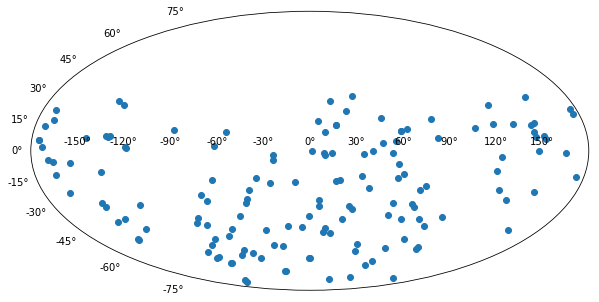

In [3]:
ra = coord.Angle(df['RAJ2000']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df['DEJ2000']*u.degree)

RA_0, DEC_0 = 21.41100,-30.72100 #degrees
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)


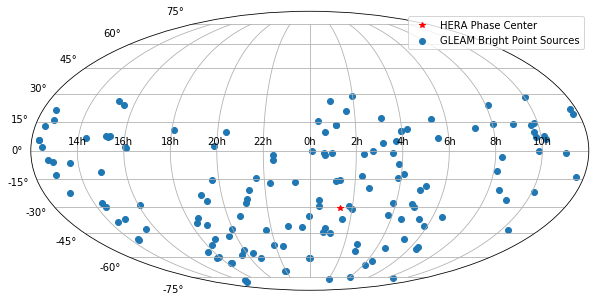

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian,label='GLEAM Bright Point Sources')
ax.plot(np.deg2rad(RA_0),np.deg2rad(DEC_0),'*r',label='HERA Phase Center')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.legend(loc='best')
ax.grid(True)

$\textbf{Antenna Layout in ENU System}$

number of Antennas 19


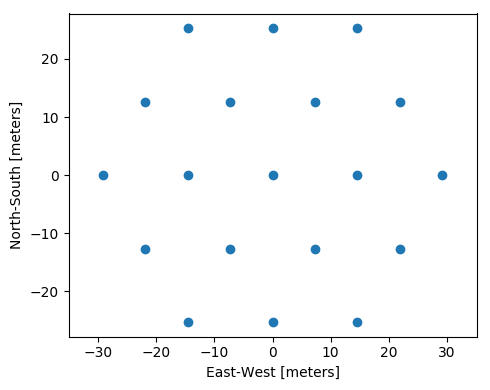

In [3]:
antposs = hex_array(3,split_core= False, outriggers=0)

hera_hex_pos = np.array([list(pos) for pos in antposs.values()])

print 'number of Antennas', len(hera_hex_pos[:,0])

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(hera_hex_pos[:,0],hera_hex_pos[:,1])
plt.xlabel("East-West [meters]")
plt.ylabel("North-South [meters]")
plt.axis('equal')
plt.tight_layout()


$\textbf{Transform from ENU to XYZ}$


For a detailed discussion refer to lecture https://web.njit.edu/~gary/728/Lecture6.html

$$
 \begin{gather}
 \begin{bmatrix} X  \\ Y \\ Z \end{bmatrix}
 =
  \begin{bmatrix}
   0 & -\sin(lat) &\cos(lat) \\
  1 & 0 & 0 \\
  0 & \cos(lat) & \sin(lat)
  \end{bmatrix} 
  \begin{bmatrix} E  \\ N \\ U \end{bmatrix}
\end{gather}
$$

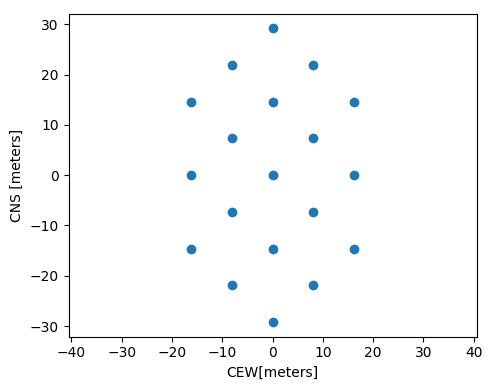

In [4]:
#HERA latitude on Earth Surface
lat = -30.722

XYZ_array = np.array([XYZ_trans_mat(hera_hex_pos[i],lat)[0] for i in range(len(hera_hex_pos))])

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(XYZ_array[:,0],XYZ_array[:,1])
plt.xlabel("CEW[meters]")
plt.ylabel("CNS [meters]")
plt.axis('equal')
plt.tight_layout()




$\textbf{Computing Baseline Vectors}$


With 19 antennas there are 30 unique baselines.
1830 baselines


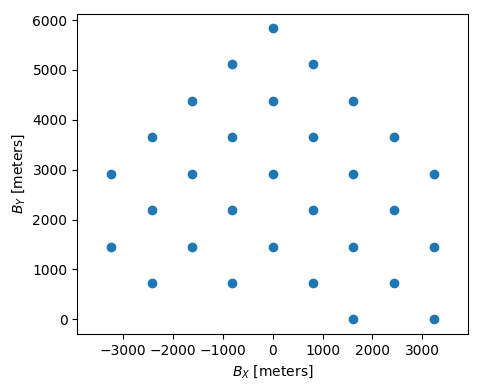

In [5]:


ants_indices = np.arange(len(XYZ_array))

ublDict = InterferometricArray(XYZ_array,ants_indices).CalculateUBLs()[4] #computing Unique Baselines
print 61*60/2 ,"baselines"

B_xyz = np.array(ublDict.keys())

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(B_xyz[:,0],B_xyz[:,1])
plt.xlabel(r"$B_X$ [meters]")
plt.ylabel(r"$B_Y$ [meters]")
plt.axis('equal')
plt.tight_layout()



$$\textbf{Transform from $\textit{B}_{\textrm{XYZ}}$ to $\textit{uvw}$ }$$


For a detailed discussion refer to lecture https://web.njit.edu/~gary/728/Lecture6.html

Below is direction cosine matrix transformation of $\textit{B}_{\textrm{XYZ}}$ to the direction peperndicular to the phase center ($\textit{h}_0,\delta_0$), thus forming $\textit{uvw}$ 

$$
 \begin{gather} 
 \begin{bmatrix} \textit{u}  \\ \textit{v}\\ \textit{w} \end{bmatrix}
 =\frac{1}{\lambda}
  \begin{bmatrix}
   \sin\textit{h}_0 & \cos\textit{h}_0 & 0 \\
  -\sin\delta_0\cos\textit{h}_0 & sin\delta_0\sin\textit{h}_0 & \cos\delta_0 \\
  \cos\delta_0\cos\textit{h}_0 &-\cos\delta_0\sin\textit{h}_0 & \sin\delta_0
  \end{bmatrix} 
  \begin{bmatrix} \textit{B}_{\textit{X}}  \\ \textit{B}_{\textit{Y}} \\ \textit{B}_{\textit{Z}}\end{bmatrix}
\end{gather}
$$

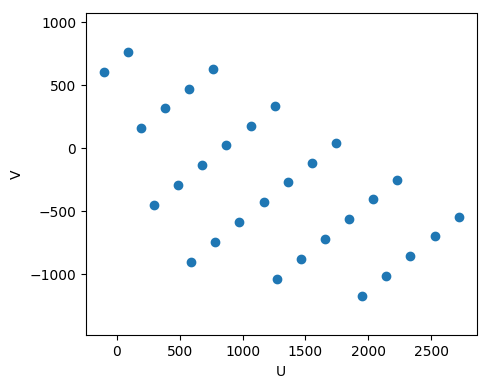

In [9]:
freq_mid =150e6 # Hz
wavelen = 3.0*10**8/freq_mid 
uvw = np.array([baseline_proj(B_xyz[i],RA_0,DEC_0)[0]*1.0/wavelen for i in range(len(B_xyz))])



plt.figure(figsize=(5,4), dpi=100)
plt.scatter(uvw[:,0],uvw[:,1])
plt.xlabel(r"U")
plt.ylabel(r"V")
plt.axis('equal')
plt.tight_layout()


$\textbf{Converting from the equatorial to direction cosine coordinates}$

$$
\begin{equation}
\textit{l}= cos\delta \sin\Delta \textit{h}
\end{equation}
$$

$$
\begin{equation}
\textit{m}= \sin\delta \cos\delta_0 -\cos\delta \sin\delta_0 \cos\Delta \textit{h}
\end{equation}
$$

$$
\begin{equation}
\textit{n} = \sqrt{1-(\textit{l}^2 +\textit{m}^2)}
\end{equation}
$$

where $\textit{l}$, $\textit{m}$ and $\textit{n}$ are direction cosine. Here $(\delta,\textit{h})$ is position on the celestial sphere, and $(\delta_0,\textit{h}_0)$ is phase center of the array, and $\Delta \textit{h} = \textit{h}-\textit{h}_0$.


$\textbf{Equatorial Co-ordinates to local Horizontal Co-ordinates}$



$$
\begin{equation}
\sin(\textrm{altitude}) = \sin(\textrm{latitude})\sin(\delta) + \cos(\textrm{latitude})\cos(\delta)\cos(\textit{h})
\end{equation}
$$
$$
\begin{equation}
\tan(azimuth) = -\frac{\sin\textit{h}}{\cos(\textrm{latitude})\tan\delta  - \sin(\textrm{latitude})  \cos\textit{h}}
\end{equation}
$$

where $\textrm{latitude}$ is position of telescope on Earth. The star hour angle with position ( $(\delta,\textit{h})$ is given by

$$
\begin{equation}
\textrm{SHA} = \textit{LST }-\textit{h}
\end{equation}
$$

where $\textit{LST }$ is the local sidereal time.

$$
\begin{equation}
\textit{h}_{rad}= \frac{\pi}{12}(\textit{h} +\frac{m}{60}+ \frac{s}{3600})
\end{equation}
$$

$$
\begin{equation}
\delta_{rad}=\frac{π}{180}(\textit{d}+ \frac{m_{arcmin}}{60}+\frac{s_{arcsec}}{3600})
\end{equation}
$$

reference:

http://math_research.uct.ac.za/~siphelo/admin/interferometry/3_Positional_Astronomy/3_4_Direction_Cosine_Coordinates.html


http://www.jgiesen.de/elevaz/basics/

http://www.jgiesen.de/astro/astroJS/siderealClock/

In [24]:
def pos_lmn(ra,dec,ra_0,dec_0):
    
    l=np.cos(dec)*np.sin(ra-ra_0)
    m=np.sin(dec)*np.cos(dec_0)-np.cos(dec)*np.sin(dec_0)*np.cos(ra-ra_0)
    n = np.sqrt(1-(l**2 + m**2))
    
    return np.array([l,m,n])

def get_radec(l,m,ra_0,dec_0):
    
    ra =ra_0 + np.arctan(1.0/(np.cos(dec_0)*np.sqrt(1-(l**2 + m**2)) - m*np.sin(dec_0)))
    dec = np.arcsin(m*np.cos(dec_0)+ np.sin(dec_0)*np.sqrt(1-(l**2 + m**2)))
    
    return [ra,dec]

def convert_radec_alt_az(ra,dec,telescope_lat):
    
    alt = np.arcsin(np.sin(telescope_lat)*np.sin(dec) + np.cos(telescope_lat)*np.cos(dec)*np.cos(ra))
    az  = np.arctan(np.sin(ra)/(np.cos(telescope_lat)*np.tan(dec) -np.sin(telescope_lat)*np.cos(ra)))
    return np.array([alt,az])
                    
    
#HERA Phase Center

LST =(np.pi/12.0)*(4.0 + 7.0/60.0 + 40.0/3600)

def cat_poslmn_above_horizon(RA,DEC,RA_0,DEC_0,LST):
    
    src_radec =[]
    src_pos_lmn =[]
    for src_i in range(len(RA)):
        SHA = LST -RA[src_i]
        alt = convert_radec_alt_az(SHA,DEC[src_i],np.deg2rad(DEC_0))[0]
    
        if alt<= 0.0:
            pass
        
        else:
        
            #print src_i, 'above the horizon'
        
            src_pos_lmn.append(pos_lmn(SHA,DEC[src_i],np.deg2rad(RA_0),np.deg2rad(DEC_0)))
            src_radec.append([SHA,DEC[src_i]])
          
            
            
    return [np.array(src_pos_lmn),np.array(src_radec)]
        
    
radec =cat_poslmn_above_horizon(RA,DEC,RA_0,DEC_0,LST)[1]


                    

$\textbf{ Gaussian Primary Beam Model}$

The simplest primary beam model is Gaussain beam, it a good approximation of main lobe. It is a good enough to capture antenna-to-antenna variation due to pointing errors and spectral variation of ful l-width-half-maximum. A two dimensional Gaussian beam centered at ($\theta_c,\phi_c$) and   measure at angular co-ordinate $(\theta,\phi)$
$$
\begin{equation}
        \textit{A}(\theta,\phi,\nu)= \frac{1}{\sqrt{2\pi((\sigma(\nu) + \varepsilon_{\sigma}(\nu))^2}}\textit{e}^{-\frac{(\theta - (\theta_c + \varepsilon_{\theta}))^2 + (\phi+ -(\phi_c\varepsilon_{\phi}))^2}{2(\sigma(\nu) + \varepsilon_{\sigma}(\nu))^2}}
\end{equation}
$$
where $\varepsilon_{\theta}$ and $\varepsilon_{\phi}$ are pointing errors, and $\varepsilon_{\sigma})$ is the beam size/shape error and, is given by
$$
\begin{equation}
\varepsilon_{\sigma}(\nu) = \kappa\sigma(\nu)
\end{equation}
$$
where $\kappa$ is fractional error of the full-width-half-maximum . $\sigma$ is approximated from FWHM of ariy disk, 
$$
\begin{equation}
        \sigma \approx 0.44\frac{\lambda}{\textit{D}}
\end{equation}
$$
. Here $\textit{D}$ dish diameter.

reference

https://courses.lumenlearning.com/austincc-physics2/chapter/27-6-limits-of-resolution-the-rayleigh-criterion/

https://stackoverflow.com/questions/31573572/healpy-from-data-to-healpix-map


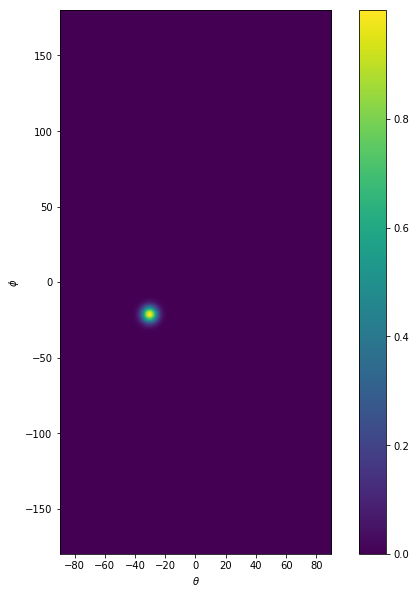

In [132]:
npoints =1000
freq_mid = 150e6
sigma_fwhm = sigma_func(14.0,freq_mid)
RA_0,DEC_0 = 21.41100,-30.72100
theta, phi = np.linspace(-np.pi/2.0,np.pi/2.0,npoints),np.linspace(-np.pi,np.pi,npoints)

gaussin_2d = np.zeros((phi.size,theta.size))
for phi_i in range(len(phi)):
    for theta_j in range(len(theta)):
        
        #print theta_j,phi_i, gaussin_2d[phi_i][theta_j],gaussian_beam(theta[theta_j],phi[phi_i],sigma_fwhm,0.0,0.0,0.0)
        
        gaussin_2d[phi_i][theta_j] = gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),theta[theta_j],phi[phi_i],sigma_fwhm,0.0,0.0,0.0)
        
        
extent = [np.rad2deg(theta[0]),np.rad2deg(theta[-1]),np.rad2deg(phi[0]),np.rad2deg(phi[-1])]      
plt.figure(figsize=(10,10))
plt.imshow(gaussin_2d,extent=extent)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.colorbar()

$\textbf{Visibility Simulation Single Baseline with one Point Source }$


In [6]:
#Test point source
#We use best fit of central flux at 151 MHz and spectral index
flux_central,spectral_ind = data_bestfit[0][0],data_bestfit[0][1]

print flux_central,spectral_ind

flux_func = lambda s_0,f_0,f,alpha : s_0*np.power(f_0/f,alpha)

97.8702559351418 0.4659824453272525


In [5]:
lsts = np.arange(0.0,2.0*np.pi,np.deg2rad(1.0))
freqs = np.linspace(140.0,160,100)


ant1_pos = np.array([0.0,0.0,0.0]) # reference antenna position in ENU coordinate system
ant2_pos = np.array([14.6,0.0,0.0])
d_block =0.0
#parametized airydisk

a_x = 7.0 #np.random.normal(6.0,0.01)
a_y = 7.0 #np.random.normal(6.0,0.01)



d_diam = 14.0 
ant1_theta_error,ant1_phi_error, ant2_theta_error,ant2_phi_error,Ant1_beam_size_error,Ant2_beam_size_error = 0.0,0.0,0.0,0.0,0.0,0.0

In [15]:
blvec=[np.power(4,2),0.0,0.0]
vis_gp =np.zeros((lsts.size,freqs.size),dtype='complex')
vis_ad =np.zeros((lsts.size,freqs.size),dtype='complex')
src_ps = np.zeros((lsts.size,3))
ra_src =(np.deg2rad(RA_0) + np.pi/2.0)
for lst_i in range(lsts.size):
            #star hour angle
            ra= lsts[lst_i] - ra_src
        
            src_pos_lmn = pos_lmn(ra,np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0))
            src_pos_lmn_phase_centr = pos_lmn(np.deg2rad(RA_0),np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0))
           
            
            src_ps[lst_i] = src_pos_lmn
            #transforming antenna position from ENU to equatorial system XYZ
            #lat = np.deg2rad(DEC_0)
            #xyz_1,xyz_2 = XYZ_trans_mat(ant1_pos,lat)[0],XYZ_trans_mat(ant2_pos,lat)[0]
            
            #computing the baseline
            #bl_xyz = xyz_2 - xyz_1

            #compute the visibility for all frequency
            vis_freq_gp = np.zeros(freqs.size,dtype ='complex')
            vis_freq_ad = np.zeros(freqs.size,dtype ='complex')
            
            for freq_i in range(freqs.size):
                lambda_ = (3e8)/(freqs[freq_i]*10**6)
                sigma_fwhm = sigma_func(d_diam,freqs[freq_i]*10**6)
                vis_freq_gp[freq_i]= (1.0/src_pos_lmn[2])*flux_func(flux_central,150.0,freqs[freq_i],spectral_ind)*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,sigma_fwhm,0.0,0.0,0.0)*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,sigma_fwhm,0.0,0.0,0.0)*np.exp(-1j*2.0*np.pi*np.dot(blvec/lambda_,src_pos_lmn))
                vis_freq_ad[freq_i]= (1.0/src_pos_lmn[2])*flux_func(flux_central,150.0,freqs[freq_i],spectral_ind)*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*np.exp(-1j*2.0*np.pi*np.dot(blvec/lambda_,src_pos_lmn))
            vis_gp[lst_i,:] = vis_freq_gp
            vis_ad[lst_i,:] = vis_freq_ad
                
 






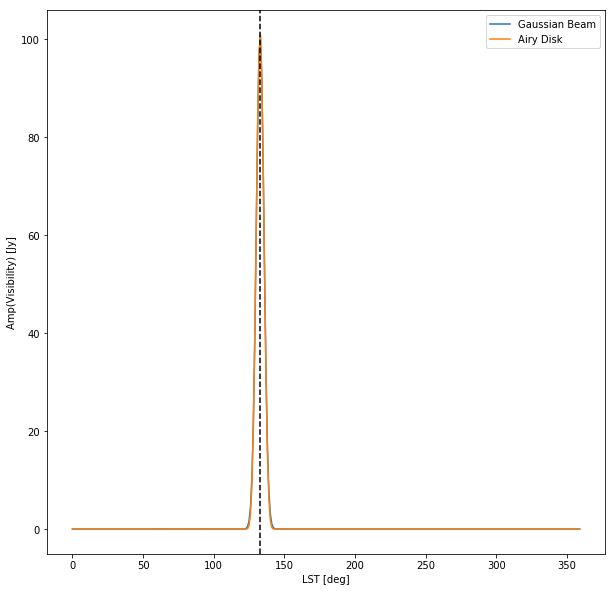

In [16]:

plt.figure(figsize =(10,10))
plt.plot(np.rad2deg(lsts),np.abs(vis_gp[:,0]),label='Gaussian Beam')
plt.plot(np.rad2deg(lsts),np.abs(vis_ad[:,0]),label='Airy Disk')
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [deg]')
plt.ylabel('Amp(Visibility) [Jy]')
plt.legend(loc='best')
                    

111.411


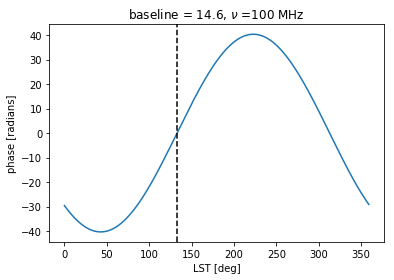

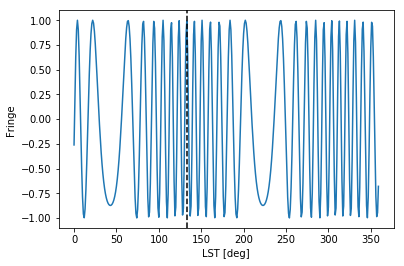

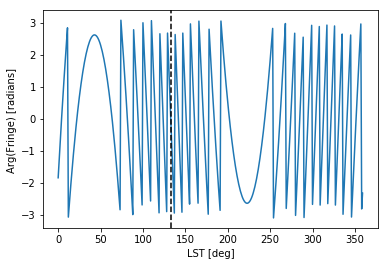

In [17]:
#fringe

phase = [2.0*np.pi*np.dot(blvec,src_ps[i])*(freqs[0]*10**6)/3e8 for i in range(len(src_ps))]

fringe=[ np.exp(-1j*phase[i]) for i in range(len(phase))]
print np.rad2deg(ra_src)
plt.title(r'baseline = 32, $\nu$ =100 MHz')
plt.plot(np.rad2deg(lsts),phase)
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [deg]')
plt.ylabel('phase [radians]')
plt.show()

plt.plot(np.rad2deg(lsts),fringe)
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [deg]')
plt.ylabel('Fringe ')
plt.show()


plt.plot(np.rad2deg(lsts),np.angle(fringe))
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [deg]')
plt.ylabel('Arg(Fringe) [radians] ')
plt.show()



In [76]:
for i in range(len(phase)):
    print i, phase[i]

0 -29.58132622410436
1 -30.05525612578992
2 -30.52003090530778
3 -30.97550898775771
4 -31.421551630103448
5 -31.85802296343526
6 -32.28479003435681
7 -32.70172284548413
8 -33.108694395044
9 -33.50558071556001
10 -33.892260911614216
11 -34.26861719667304
12 -34.63453492896622
13 -34.98990264640775
14 -35.334612100548384
15 -35.66855828954912
16 -35.99163949016579
17 -36.3037572887349
18 -36.60481661115146
19 -36.89472575182946
20 -37.17339640163622
21 -37.44074367479226
22 -37.696686134728324
23 -37.94114581889175
24 -38.174048262494615
25 -38.39532252119642
26 -38.60490119271441
27 -38.80272043735504
28 -38.988719997460045
29 -39.16284321576163
30 -39.3250370526407
31 -39.475252102283356
32 -39.6134426077303
33 -39.73956647481489
34 -39.85358528498543
35 -39.955464307007816
36 -40.04517250754501
37 -40.12268256061011
38 -40.18797085589009
39 -40.24101750593775
40 -40.28180635222963
41 -40.31032497008798
42 -40.32656467246556
43 -40.330520512591704
44 -40.32219128547919
45 -40.301579528

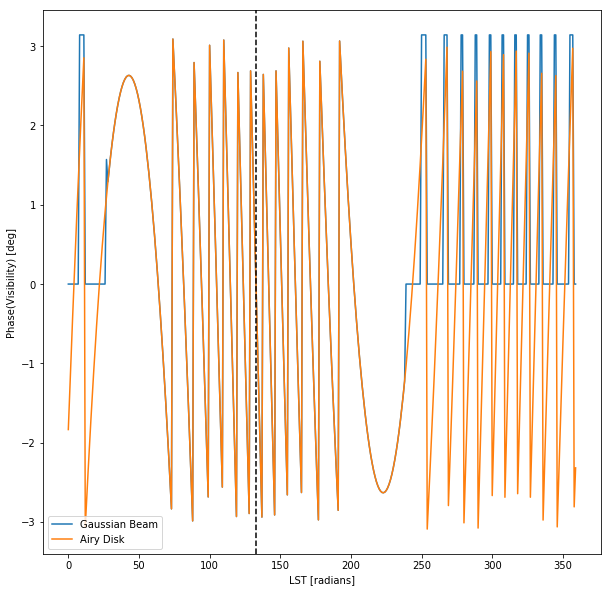

In [18]:
plt.figure(figsize =(10,10))
plt.plot(np.rad2deg(lsts),np.angle(vis_gp[:,0]),label='Gaussian Beam')
plt.plot(np.rad2deg(lsts),np.angle(vis_ad[:,0]),label='Airy Disk')
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [radians]')
plt.ylabel('Phase(Visibility) [deg]')
plt.legend(loc='best')


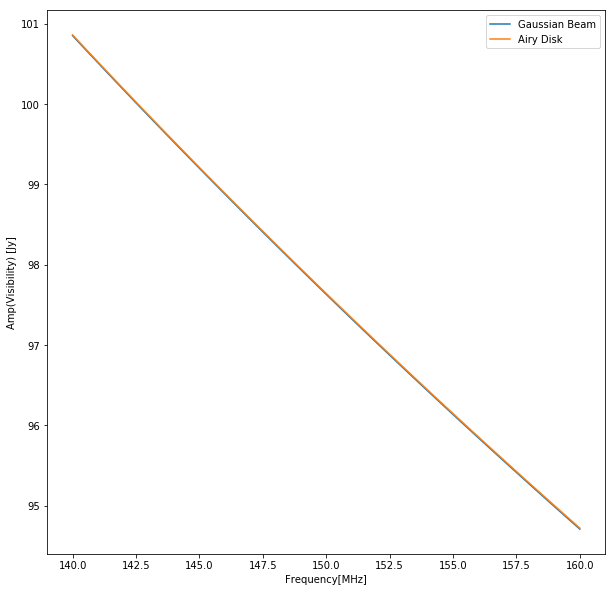

In [19]:
plt.figure(figsize =(10,10))
plt.plot(freqs,np.abs(vis_gp[133]),label='Gaussian Beam')
plt.plot(freqs,np.abs(vis_ad[133]),label='Airy Disk')
plt.xlabel('Frequency[MHz]')
plt.ylabel('Amp(Visibility) [Jy]')
plt.legend(loc='best')


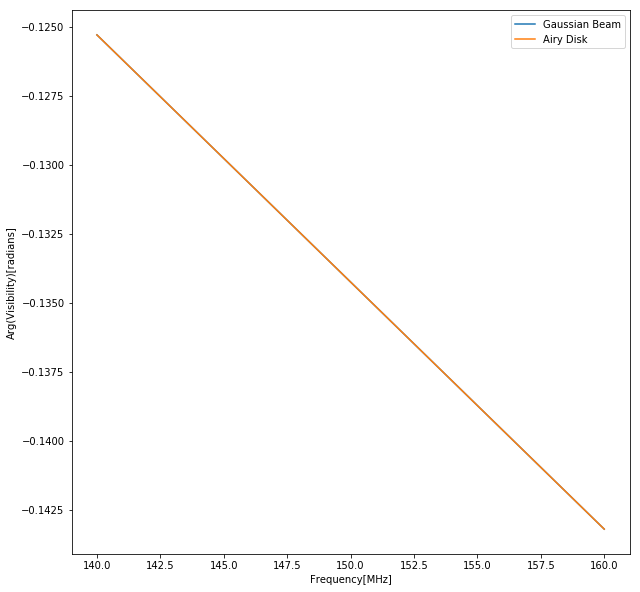

In [20]:
plt.figure(figsize =(10,10))
plt.plot(freqs,np.angle(vis_gp[133]),label='Gaussian Beam')
plt.plot(freqs,np.angle(vis_ad[133]),label='Airy Disk')
plt.xlabel('Frequency[MHz]')
plt.ylabel('Arg(Visibility)[radians]')
plt.legend(loc='best')

$\textbf{Visibility Waterfall}$

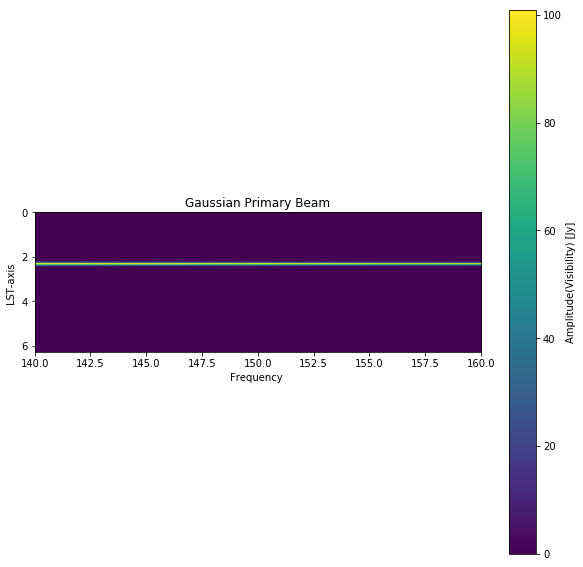

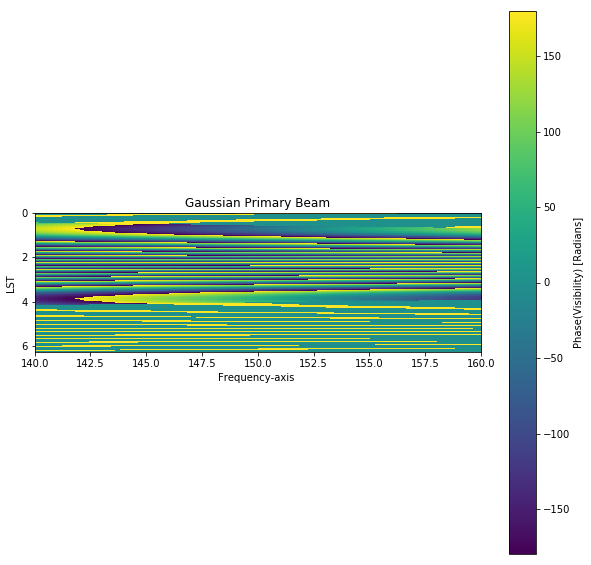

In [22]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.abs(vis_gp),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST-axis ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.angle(vis_gp,deg='deg'),extent=extent)
plt.xlabel('Frequency-axis ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

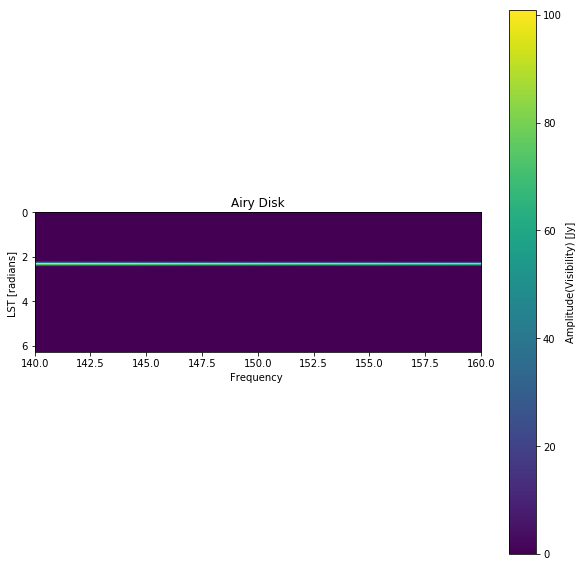

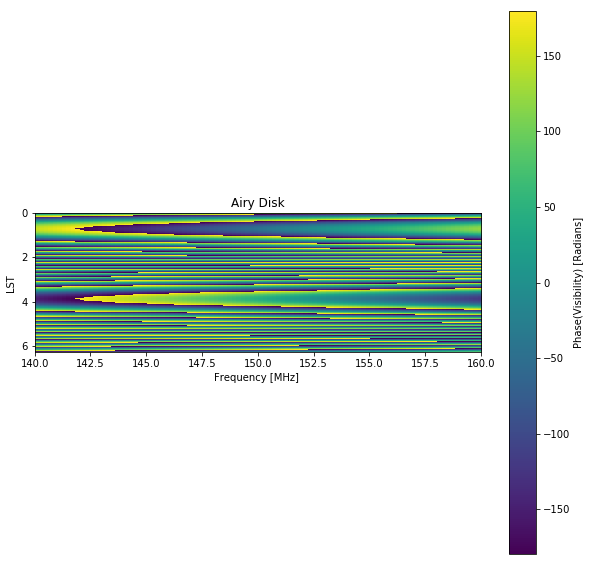

In [23]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.abs(vis_ad),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST [radians] ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.angle(vis_ad,deg='deg'),extent=extent)
plt.xlabel('Frequency [MHz] ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

$\textbf{Delay Visibility}$

In [28]:
def get_bandwidth(window_func,frqs,dfreq =1.0):
    "This function compute the bandwidth given the window function as an array, and freqs array where it is sampled"
    
    bandwidth = intg.simps(window_func,frqs,dfreq)
    
    return bandwidth

window = signal.nuttall(freqs.size)


def get_delay_vis(data,window,frqs):
    delay_data=np.fft.ifft(data*window)
    delaydata_shift=np.fft.fftshift(delay_data)
    delays = np.fft.fftfreq(frqs.size,frqs[1]-frqs[0])
    delays = np.fft.fftshift(delays)
    
    return [delays,delaydata_shift]

frq_mid = 150 # Central frequency in MHz
c=3e8
jy2mK = 1e-26*(c/(frq_mid*1e6))**2/(2*CNST1.k)*1e3



ant1_pos = np.array([0.0,0.0,0.0]) # reference antenna position in ENU coordinate system
ant2_pos = np.array([14.6,0.0,0.0])
bl = np.linalg.norm(ant2_pos-ant1_pos)

def geometric_delay(bl):
    return bl/c

bl= np.linalg.norm(blvec)
g_dl = geometric_delay(bl)

ddata_gb = np.array([get_delay_vis(vis_gp[lst_i]*jy2mK,window,freqs)[1] for lst_i in range(vis_gp.shape[0])])
ddata_ad = np.array([get_delay_vis(vis_ad[lst_i]*jy2mK,window,freqs)[1] for lst_i in range(vis_ad.shape[0])])

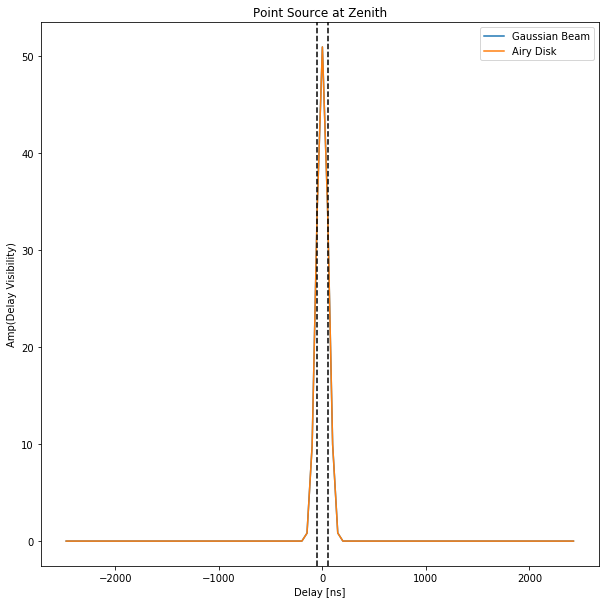

In [29]:
delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6 -freqs[0]*10**6)
delays = np.fft.fftshift(delays)*10**9

plt.figure(figsize=(10,10))
plt.title('Point Source at Zenith')
plt.plot(delays,np.abs(ddata_gb[133]),label='Gaussian Beam')
plt.plot(delays,np.abs(ddata_ad[133]),label='Airy Disk')
plt.axvline(g_dl*10**9,ls='dashed',color='black')
plt.axvline(-g_dl*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


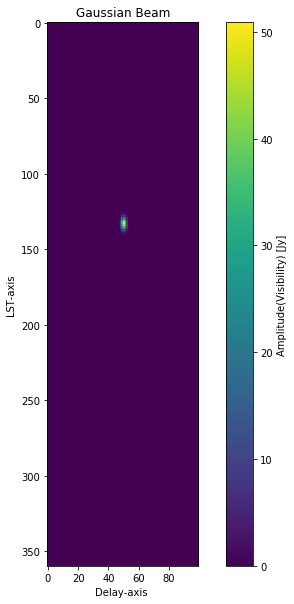

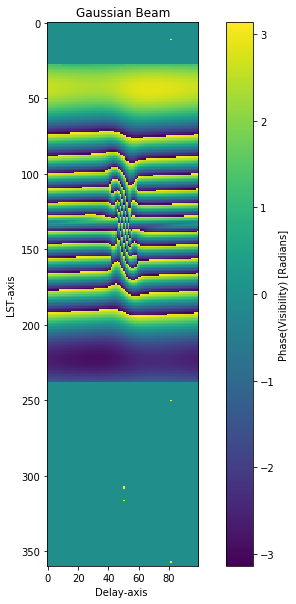

In [30]:

delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6-freqs[0]*10**6)
delays = np.fft.fftshift(delays)
extent =[delays[0],delays[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.abs(ddata_gb))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay-axis ')
plt.ylabel('LST-axis ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.angle(ddata_gb))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay-axis ')
plt.ylabel('LST-axis ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()


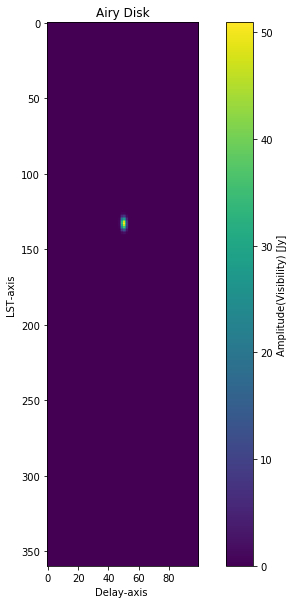

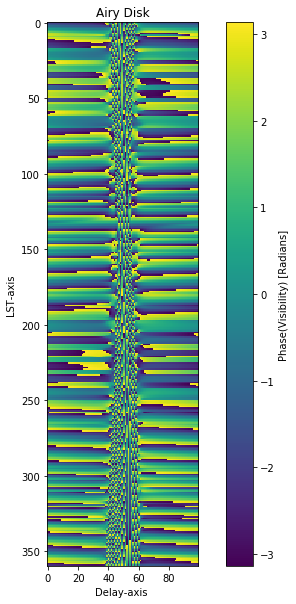

In [31]:

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.abs(ddata_ad))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay-axis ')
plt.ylabel('LST-axis ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.angle(ddata_ad))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay-axis ')
plt.ylabel('LST-axis ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

$\textbf{Visibility Simulation Mult-Baseline with one Point Source }$


In [4]:
blvecs=[[np.power(4,2),0.0,0.0],[np.power(4,3),0.0,0.0],[np.power(4,4),0.0,0.0],[np.power(4,5),0.0,0.0]]

In [7]:

d_block =0.0
#parametized airydisk

a_x = 7.0 #np.random.normal(6.0,0.01)
a_y = 7.0 #np.random.normal(6.0,0.01)

flux_central,spectral_ind = data_bestfit[0][0],data_bestfit[0][1]

d_diam = 14.0 
ant1_theta_error,ant1_phi_error, ant2_theta_error,ant2_phi_error,Ant1_beam_size_error,Ant2_beam_size_error = 0.0,0.0,0.0,0.0,0.0,0.0
lsts = np.arange(0.0,2.0*np.pi,np.deg2rad(1.0))
freqs = np.linspace(140.0,160.0,100)


vis_all_bls_gp=[]
vis_all_bls_ad=[]
ra_src =(np.deg2rad(RA_0) + np.pi/2.0)
for bl_j in range(len(blvecs)):
    
 
    print blvecs[bl_j]
    vis_gp =np.zeros((lsts.size,freqs.size),dtype='complex')
    vis_ad =np.zeros((lsts.size,freqs.size),dtype='complex')
    for lst_i in range(lsts.size):
     
            ra= lsts[lst_i] - ra_src
        
            src_pos_lmn = pos_lmn(ra,np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0))
            
    
    
            #compute the visibility for all frequency
            vis_freq_gp = np.zeros(freqs.size,dtype ='complex')
            vis_freq_ad = np.zeros(freqs.size,dtype ='complex')
            
            for freq_i in range(freqs.size):
                lambda_ = (3e8)/(freqs[freq_i]*10**6)
                sigma_fwhm = sigma_func(d_diam,freqs[freq_i]*10**6)
                vis_freq_gp[freq_i]= (1.0/src_pos_lmn[2])*flux_func(flux_central,150,freqs[freq_i],spectral_ind)*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,sigma_fwhm,0.0,0.0,0.0)*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,sigma_fwhm,0.0,0.0,0.0)*np.exp(-1j*2.0*np.pi*np.dot( blvecs[bl_j]/lambda_,src_pos_lmn))
                vis_freq_ad[freq_i]= (1.0/src_pos_lmn[2])*flux_func(flux_central,150,freqs[freq_i],spectral_ind)*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*np.exp(-1j*2.0*np.pi*np.dot( blvecs[bl_j]/lambda_,src_pos_lmn))
            vis_gp[lst_i,:] = vis_freq_gp
            vis_ad[lst_i,:] = vis_freq_ad
                
    vis_all_bls_gp.append(vis_gp)
    vis_all_bls_ad.append(vis_ad)



[16, 0.0, 0.0]
[64, 0.0, 0.0]
[256, 0.0, 0.0]
[1024, 0.0, 0.0]


$\textbf{Visibility as Function of Baseline}$

In [8]:
vis_bl_ad = [vis_all_bls_ad[j][133][49] for j in range(len(vis_all_bls_ad))]
vis_bl_gb = [vis_all_bls_gp[j][133][49] for j in range(len(vis_all_bls_gp))]

bllen = [np.linalg.norm(blvecs[i]) for i in range(len(blvecs))]


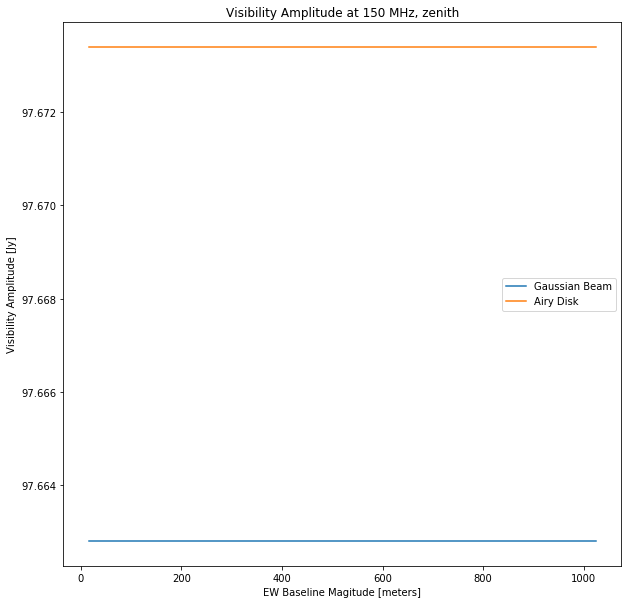

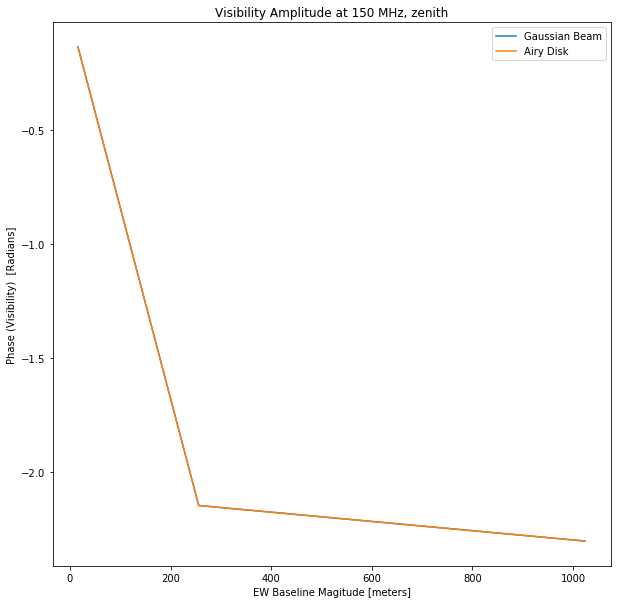

In [9]:
plt.figure(figsize=(10,10))
plt.title('Visibility Amplitude at 150 MHz, zenith')
plt.plot(bllen,np.abs(vis_bl_gb),label='Gaussian Beam')
plt.plot(bllen,np.abs(vis_bl_ad),label='Airy Disk')
plt.xlabel('EW Baseline Magitude [meters]')
plt.ylabel('Visibility Amplitude [Jy]')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,10))
plt.title('Visibility Amplitude at 150 MHz, zenith')
plt.plot(bllen,np.angle(vis_bl_gb),label='Gaussian Beam')
plt.plot(bllen,np.angle(vis_bl_ad),label='Airy Disk')
plt.xlabel('EW Baseline Magitude [meters]')
plt.ylabel('Phase (Visibility)  [Radians]')
plt.legend(loc='best')
plt.show()



$\textbf{Waterfalls | Gaussian Beam}$

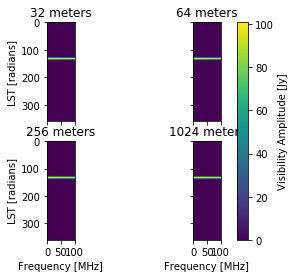

In [10]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.abs(vis_all_bls_gp[0]),extent=extent)
axs[0, 0].set_title('32 meters')
axs[0, 1].imshow(np.abs(vis_all_bls_gp[1]),extent=extent)
axs[0, 1].set_title('64 meters')
axs[1, 0].imshow(np.abs(vis_all_bls_gp[2]),extent=extent)
axs[1, 0].set_title('256 meters')
axs[1, 1].imshow(np.abs(vis_all_bls_gp[3]),extent=extent)
axs[1, 1].set_title('1024 meters')
image1 = axs[0,0].imshow(np.abs(vis_all_bls_gp[0]))
image2 = axs[0,1].imshow(np.abs(vis_all_bls_gp[1]))
image3= axs[1,0].imshow(np.abs(vis_all_bls_gp[2]))
image4 = axs[1,1].imshow(np.abs(vis_all_bls_gp[3]))
fig.colorbar(image1,ax=axs, orientation='vertical',label='Visibility Amplitude [Jy]')

for ax in axs.flat:
    ax.set(xlabel='Frequency [MHz]', ylabel='LST [radians]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


$\textbf{Waterfalls | Airy Disk}$

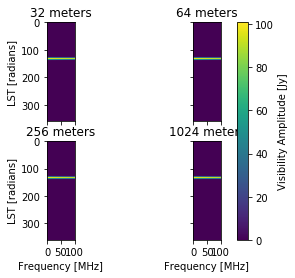

In [11]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.abs(vis_all_bls_ad[0]),extent=extent)
axs[0, 0].set_title('32 meters')
axs[0, 1].imshow(np.abs(vis_all_bls_ad[1]),extent=extent)
axs[0, 1].set_title('64 meters')
axs[1, 0].imshow(np.abs(vis_all_bls_ad[2]),extent=extent)
axs[1, 0].set_title('256 meters')
axs[1, 1].imshow(np.abs(vis_all_bls_ad[3]),extent=extent)
axs[1, 1].set_title('1024 meters')
image1 = axs[0,0].imshow(np.abs(vis_all_bls_ad[0]))
image2 = axs[0,1].imshow(np.abs(vis_all_bls_ad[1]))
image3= axs[1,0].imshow(np.abs(vis_all_bls_ad[2]))
image4 = axs[1,1].imshow(np.abs(vis_all_bls_ad[3]))
fig.colorbar(image1,ax=axs, orientation='vertical',label='Visibility Amplitude [Jy]')

for ax in axs.flat:
    ax.set(xlabel='Frequency [MHz]', ylabel='LST [radians]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


$\textbf{Delay Visibility | Gaussain Beam}$

$\textbf{Analitical Delay Visibility}$

$$
\begin{equation}
    \textit{V}(\mathbf{b}_{\textit{a},\textit{b}},\tau)= \sum_{\textit{q}=1}^{\textit{N}_{\textrm{src}}} \tilde{\textit{A}}(\textit{l}_{\textit{q}},\textit{m}_{\text{q}},\tau)  \tilde{\textit{S}}_{\textit{q}}(\tau) \delta_{\textrm{D}}(\tau_{\textrm{q}}-\tau)
\end{equation}
$$

$\textbf{Delay Baseline Primary Beam}$

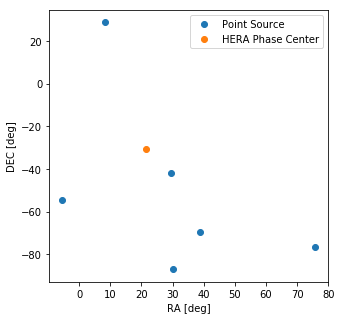

In [322]:
#Simulation Catalogue
nsrc =6
cat = np.array([[np.deg2rad(RA_0) + np.deg2rad(np.random.normal(0.0,30.0)),np.deg2rad(DEC_0) + np.deg2rad(np.random.normal(0.0,30.0)),1000] for i in range(nsrc)])

plt.figure(figsize=(5,5))
plt.scatter(np.rad2deg(cat[:,0]),np.rad2deg(cat[:,1]),label='Point Source')
plt.scatter(RA_0,DEC_0,label='HERA Phase Center')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.legend(loc='best')





Text(0,0.5,'Frequency [MHz]')

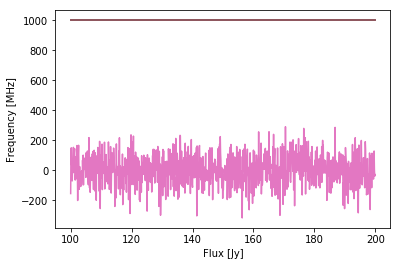

In [334]:
freqs = np.arange(100.0,200.0,0.1)
freq_central = 150.0
cat_spec =np.zeros((nsrc,freqs.size))
for src_i in range(nsrc):
    spec_ind =np.random.uniform(0.0,1.0)
    cat_spec[src_i] = [1000 for freq_i in freqs]
    
    

non_flat_spect = [flux_func(cat[0][2],freq_central,freq_i,spec_ind)*np.random.normal(0.0,0.1) for freq_i in freqs]


for src_i in range(nsrc):
    plt.plot(freqs,cat_spec[src_i])
    
plt.plot(freqs,non_flat_spect)
plt.xlabel('Flux [Jy]')
plt.ylabel('Frequency [MHz]')



In [335]:
cat_spec[5] =non_flat_spect


In [336]:
lat = np.deg2rad(DEC_0)
ant1_pos = np.array([0.0,0.0,0.0]) # reference antenna position in ENU coordinate system
ant2_pos = np.array([14.6,0.0,0.0])
ant3_pos = np.array([32.0,0.0,0.0])
xyz_1,xyz_2 = XYZ_trans_mat(ant1_pos,lat)[0],XYZ_trans_mat(ant3_pos,lat)[0]
            
#computing the baseline
bl_xyz = xyz_2 - xyz_1


src_pos_lmn = [pos_lmn(cat[src_i][0],cat[src_i][0],np.deg2rad(RA_0),np.deg2rad(DEC_0)) for src_i in range(nsrc)]  
    
d_diam =14.6 

#compute the visibility for all frequency

vis_freq_all = np.zeros((nsrc,freqs.size),dtype ='complex')

for src_i in range(nsrc):
    vis_freq_gp = np.zeros(freqs.size,dtype ='complex')
    for freq_i in range(freqs.size):
        lambda_ = (3e8)/(freqs[freq_i]*10**6)
        sigma_fwhm = sigma_func(d_diam,freqs[freq_i]*10**6)
    
        vis_freq_gp[freq_i]= (1.0/src_pos_lmn[src_i][2])*cat_spec[src_i][freq_i]*np.exp(-1j*2.0*np.pi*np.dot(bl_xyz/lambda_,src_pos_lmn[src_i]))
    vis_freq_all[src_i]=vis_freq_gp
    
    
                

In [283]:
vis_freq_all.shape

(6, 1000)

In [337]:

g_dl = geometric_delay(np.linalg.norm(bl_xyz))

ddata_gb = [get_delay_vis(vis_freq_all[src_i]*jy2mK,window,freqs)[1] for src_i in range(nsrc)]


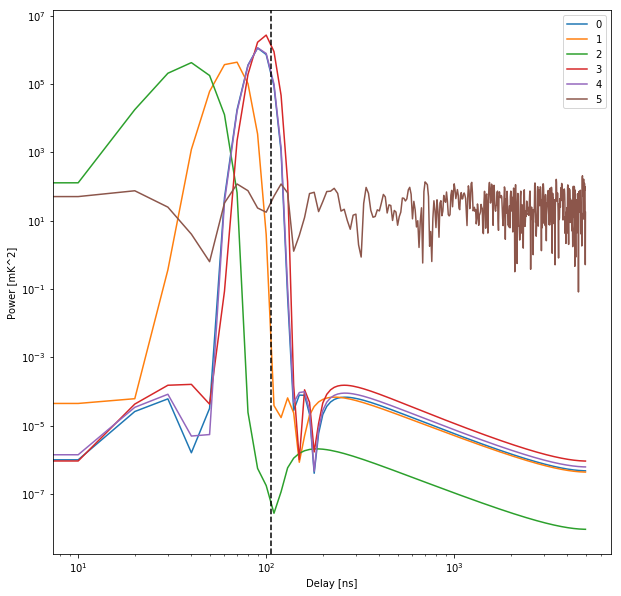

In [338]:
delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6 -freqs[0]*10**6)
delays = np.fft.fftshift(delays)*10**9

plt.figure(figsize=(10,10))

for src_i in range(nsrc):
    plt.loglog(delays[delays.size/2:],np.abs(ddata_gb[src_i][delays.size/2:])**2,label=str(src_i))
    
    
plt.axvline(g_dl*10**9,ls='dashed',color='black')
#plt.axvline(-g_dl*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Power [mK^2]')
plt.legend(loc='best')


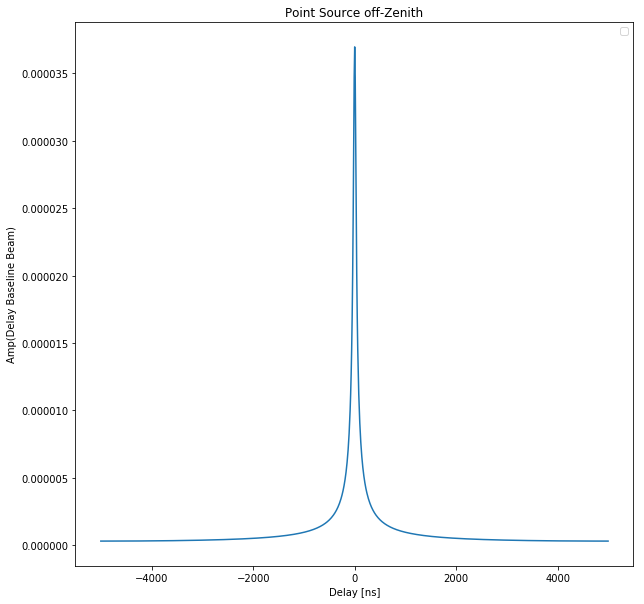

In [156]:
def get_delay_bl_gaussbeam(dish_diam,RA_0,DEC_0,RA_i,DEC_i,freqs,ant1_theta_error=0.0,ant1_phi_error=0.0, ant2_theta_error=0.0,ant2_phi_error=0.0,Ant1_beam_size_error=0.0,Ant2_beam_size_error=0.0):
    
    
    bl_beam = np.zeros(freqs.size)
    
    for freq_i in range(len(freqs)):
        lambda_ = (3e8)/(freqs[freq_i]*10**6)
        
        sigma_fwhm = sigma_func(dish_diam,freqs[freq_i]*10**6)
                
        bl_beam[freq_i]= gaussian_beam(np.deg2rad(RA_0),np.deg2rad(DEC_0),DEC_i,RA_i,sigma_fwhm,ant1_theta_error,ant1_phi_error,Ant1_beam_size_error)*gaussian_beam(np.deg2rad(RA_0),np.deg2rad(DEC_0),DEC_i,RA_i,sigma_fwhm,ant2_theta_error,ant2_phi_error,Ant2_beam_size_error)
    
    delay_bl_beam = np.fft.ifft(bl_beam)
    delay_bl_beam = np.fft.fftshift(delay_bl_beam)
    
    return delay_bl_beam

delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6-freqs[0]*10**6)
delays = np.fft.fftshift(delays)
dish_diam = 14.6 # meters
RA_i,DEC_i = np.deg2rad(RA_0)- np.deg2rad(10),np.deg2rad(DEC_0) -np.deg2rad(10)

plt.figure(figsize=(10,10))
plt.title('Point Source off-Zenith')
plt.plot(delays*10**9,np.abs(get_delay_bl_gaussbeam(dish_diam,RA_0,DEC_0,RA_i,DEC_i,freqs)))
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Baseline Beam)')
plt.legend(loc='best')

    

$\textbf{Delay Transform of Point Source Flux}$


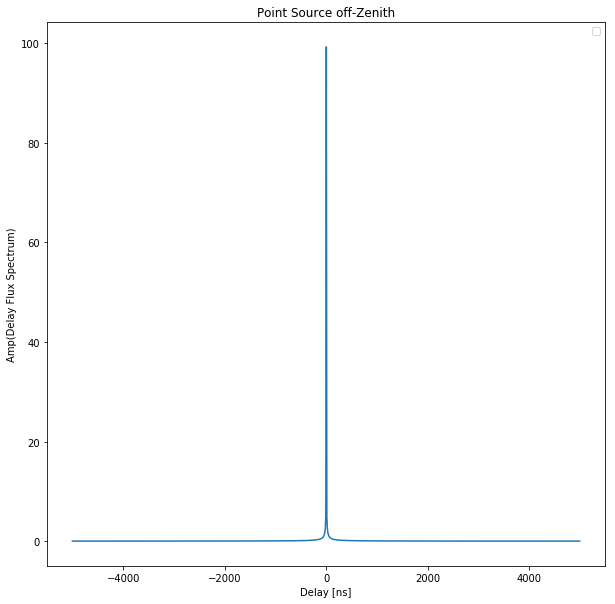

In [144]:
def get_delay_spectrum_pt_src(S_0,spectral_index,freq_array,freq_central=150):
    
    flux= [flux_func(S_0,freq_central,freq_i,spectral_index) for freq_i in freq_array]
    delay_flux = np.fft.ifft(flux)
    delay_flux = np.fft.fftshift(delay_flux)
     
    return delay_flux

S_0,spectral_index =data_bestfit[0][0],data_bestfit[0][1]


plt.figure(figsize=(10,10))
plt.title('Point Source off-Zenith')
plt.plot(delays*10**9,np.abs(get_delay_spectrum_pt_src(S_0,spectral_index,freqs)))
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Flux Spectrum)')
plt.legend(loc='best')

    

$\textbf{Delay Transform of Fringe Function}$


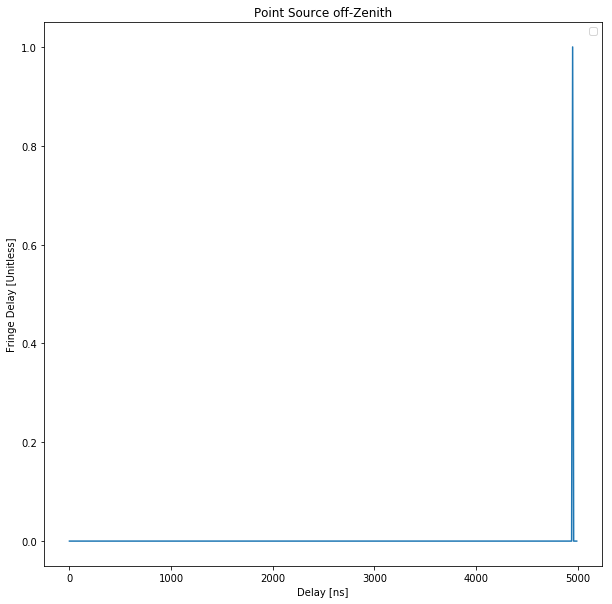

In [157]:
# Analical Delay Visibility

#Dirac Delta function
def geometric_delay(bl_xyz,RA_i,DEC_i,RA_0,DEC_0):
    src_pos_lmn = pos_lmn(RA_i,DEC_i,np.deg2rad(RA_0),np.deg2rad(DEC_0))
    return np.dot(bl_xyz/lambda_,src_pos_lmn)/c


lat = np.deg2rad(DEC_0)
xyz_1,xyz_2 = XYZ_trans_mat(ant1_pos,lat)[0],XYZ_trans_mat(ant2_pos,lat)[0]
            
#computing the baseline
bl_xyz = xyz_2 - xyz_1
ngdelay = int(geometric_delay(bl_xyz,RA_i,DEC_i,RA_0,DEC_0)*10**9)

ndelay = delays.size/2

fringe_delay =signal.unit_impulse(ndelay,ngdelay)

plt.figure(figsize=(10,10))
plt.title('Point Source off-Zenith')
plt.plot(delays[delays.size/2:]*10**9,fringe_delay)
plt.xlabel('Delay [ns]')
plt.ylabel('Fringe Delay [Unitless]')
plt.legend(loc='best')

    



In [12]:
def get_bandwidth(window_func,frqs,dfreq =1.0):
    "This function compute the bandwidth given the window function as an array, and freqs array where it is sampled"
    
    bandwidth = intg.simps(window_func,frqs,dfreq)
    
    return bandwidth

window = signal.nuttall(freqs.size)


def get_delay_vis(data,window,frqs):
    delay_data=np.fft.ifft(data*window)
    delaydata_shift=np.fft.fftshift(delay_data)
    delays = np.fft.fftfreq(frqs.size,frqs[1]-frqs[0])
    delays = np.fft.fftshift(delays)
    
    return [delays,delaydata_shift]

frq_mid = 150 # Central frequency in MHz
c=3e8
jy2mK = 1e-26*(c/(frq_mid*1e6))**2/(2*CNST1.k)*1e3




def geometric_delay(b_xyz,src_pos_lmn):
    return np.dot(bl_xyz/lambda_,src_pos_lmn)/c

bl= 14.6
max_g_dl_vecs = [np.linalg.norm(blvecs[bl_i])/c for bl_i in range(len(blvecs))]

delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6-freqs[0]*10**6)
delays = np.fft.fftshift(delays)
ddata_gb =[]
ddata_ad =[]
for bl_i in range(len(blvecs)):
    
    ddata_gb.append(np.array([get_delay_vis(vis_all_bls_gp[bl_i][lst_i]*jy2mK,window,freqs)[1] for lst_i in range(vis_all_bls_gp[bl_i].shape[0])]))
    ddata_ad.append(np.array([get_delay_vis(vis_all_bls_ad[bl_i][lst_i]*jy2mK,window,freqs)[1] for lst_i in range(vis_all_bls_ad[bl_i].shape[0])]))

$\textbf{Delay Visibility with Gaussian Beam}$

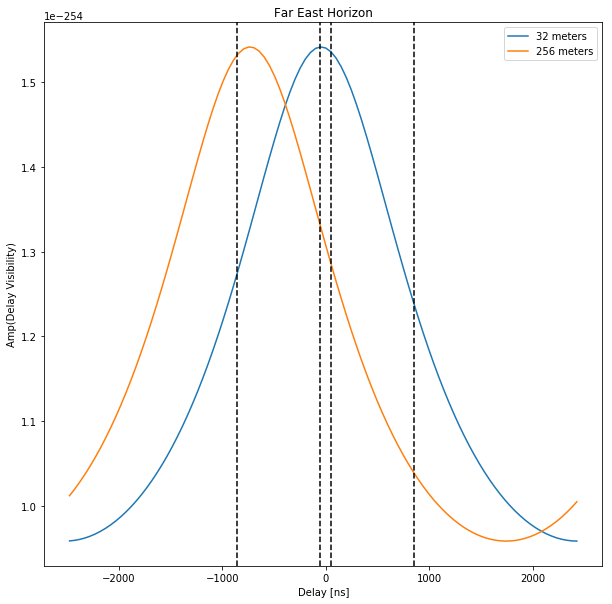

In [13]:
plt.figure(figsize=(10,10))
plt.title('Far East Horizon')
plt.plot(delays*10**9,np.abs(ddata_gb[0][40]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_gb[2][40]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')



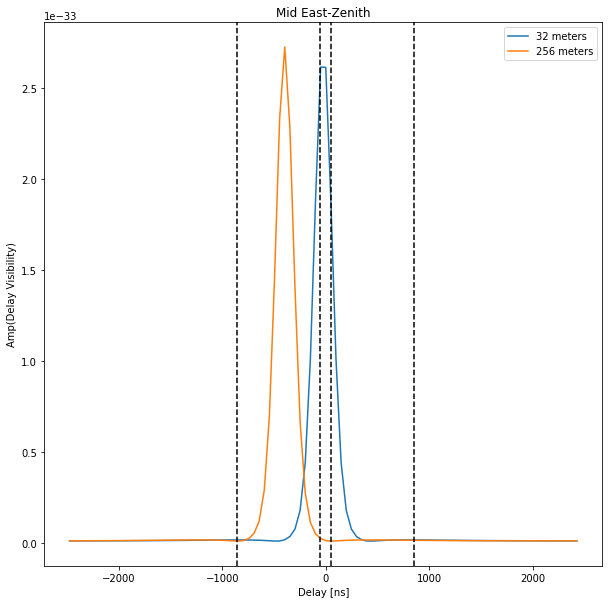

In [79]:
plt.figure(figsize=(10,10))
plt.title('Mid East-Zenith')
plt.plot(delays*10**9,np.abs(ddata_gb[0][100]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_gb[2][100]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


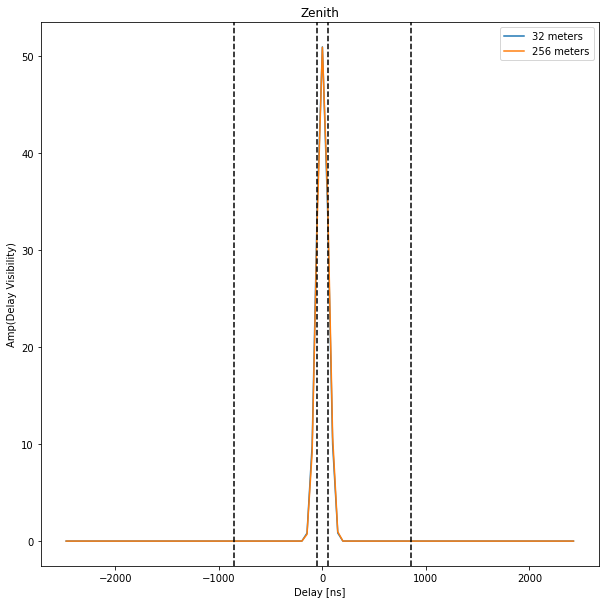

In [80]:
plt.figure(figsize=(10,10))
plt.title('Zenith')
plt.plot(delays*10**9,np.abs(ddata_gb[0][133]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_gb[2][133]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


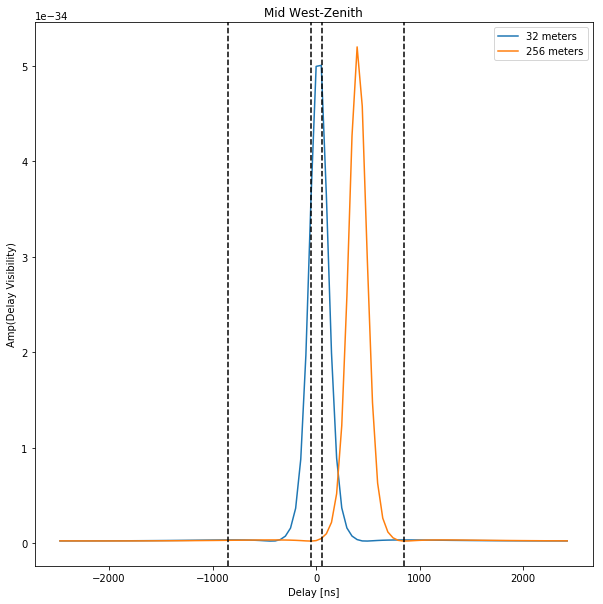

In [82]:
plt.figure(figsize=(10,10))
plt.title('Mid West-Zenith')
plt.plot(delays*10**9,np.abs(ddata_gb[0][166]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_gb[2][166]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


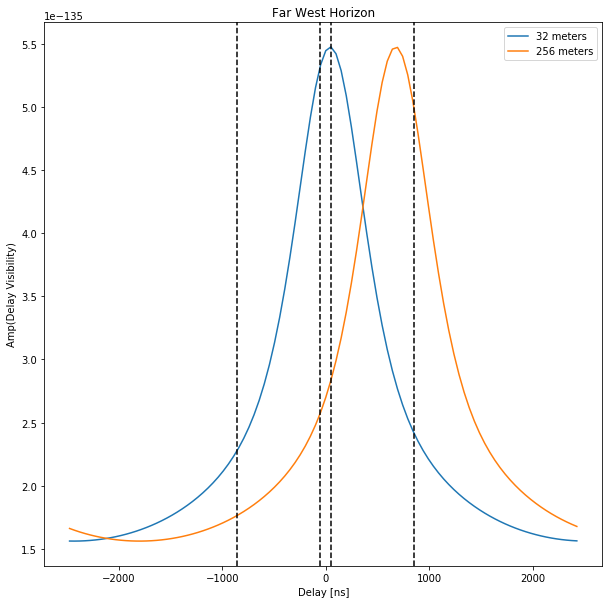

In [84]:
plt.figure(figsize=(10,10))
plt.title('Far West Horizon')
plt.plot(delays*10**9,np.abs(ddata_gb[0][200]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_gb[2][200]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


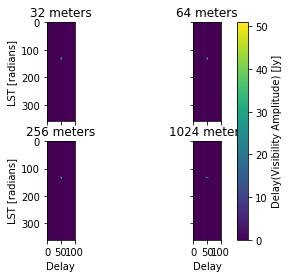

In [66]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.abs(ddata_gb[0]),extent=extent)
axs[0, 0].set_title('32 meters')
axs[0, 1].imshow(np.abs(ddata_gb[1]),extent=extent)
axs[0, 1].set_title('64 meters')
axs[1, 0].imshow(np.abs(ddata_gb[2]),extent=extent)
axs[1, 0].set_title('256 meters')
axs[1, 1].imshow(np.abs(ddata_gb[3]),extent=extent)
axs[1, 1].set_title('1024 meters')
image1 = axs[0,0].imshow(np.abs(ddata_gb[0]))
image2 = axs[0,1].imshow(np.abs(ddata_gb[1]))
image3= axs[1,0].imshow(np.abs(ddata_gb[2]))
image4 = axs[1,1].imshow(np.abs(ddata_gb[3]))
fig.colorbar(image1,ax=axs, orientation='vertical',label='Delay(Visibility Amplitude) [Jy]')

for ax in axs.flat:
    ax.set(xlabel='Delay', ylabel='LST [radians]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


$\textbf{Delay Visibility with Airy Disk}$

In [1]:
plt.figure(figsize=(10,10))
plt.title('Far East Horizon')
plt.plot(delays*10**9,np.abs(ddata_ad[0][40]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_ad[1][40]),label='256 meters')
plt.plot(delays*10**9,np.abs(ddata_ad[2][40]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')

NameError: name 'plt' is not defined

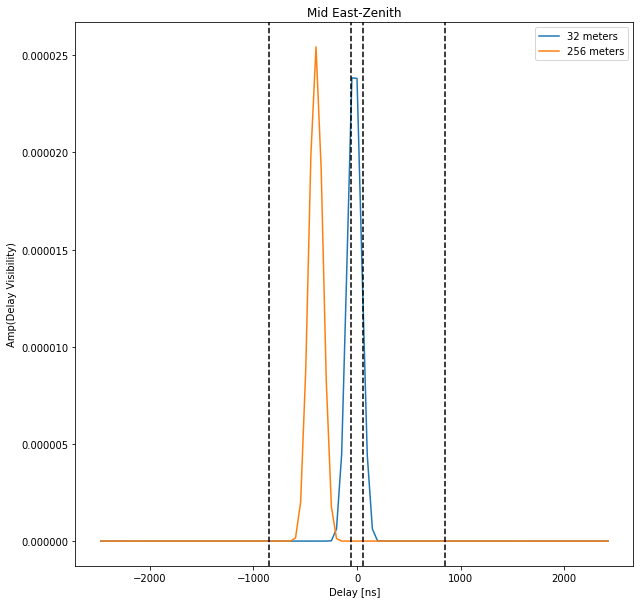

In [15]:
plt.figure(figsize=(10,10))
plt.title('Mid East-Zenith')
plt.plot(delays*10**9,np.abs(ddata_ad[0][100]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_ad[2][100]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


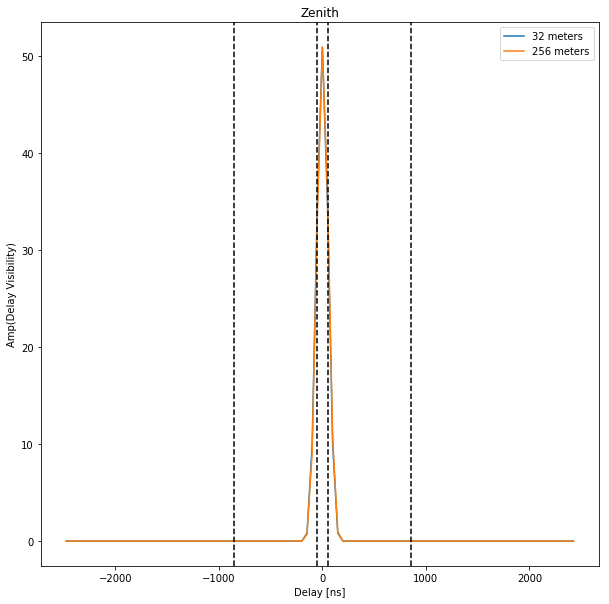

In [16]:
plt.figure(figsize=(10,10))
plt.title('Zenith')
plt.plot(delays*10**9,np.abs(ddata_ad[0][133]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_ad[2][133]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')

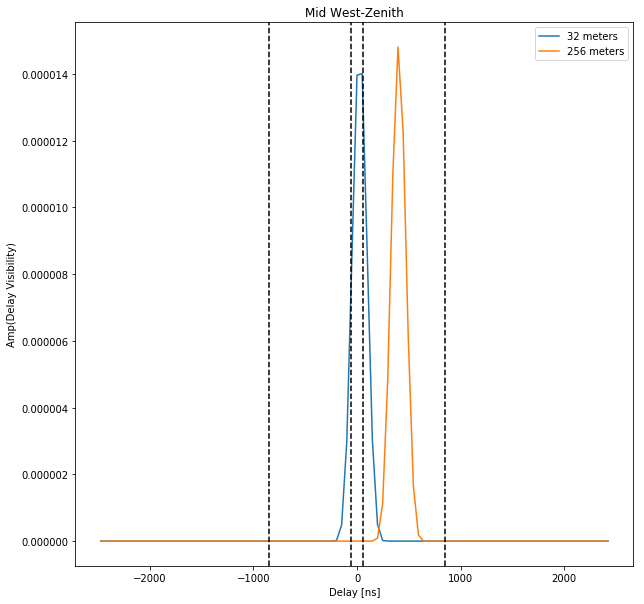

In [17]:
plt.figure(figsize=(10,10))
plt.title('Mid West-Zenith')
plt.plot(delays*10**9,np.abs(ddata_ad[0][166]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_ad[2][166]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


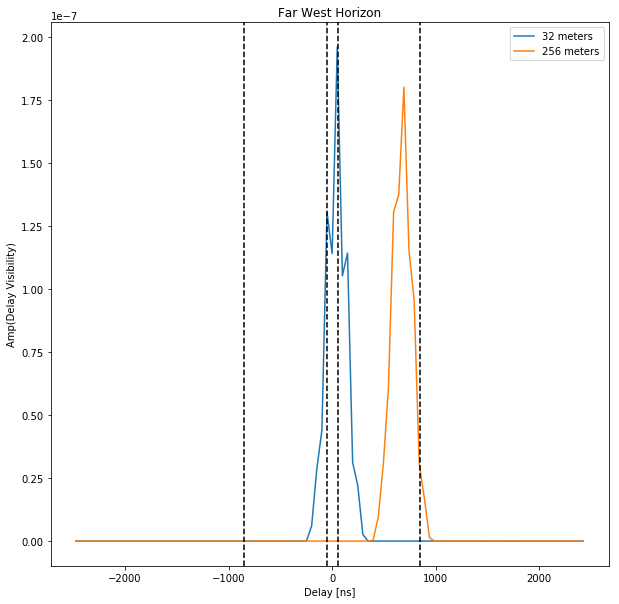

In [19]:
plt.figure(figsize=(10,10))
plt.title('Far West Horizon')
plt.plot(delays*10**9,np.abs(ddata_ad[0][200]),label='32 meters')
plt.plot(delays*10**9,np.abs(ddata_ad[2][200]),label='256 meters')
plt.axvline(max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[0]*10**9,ls='dashed',color='black')
plt.axvline(max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.axvline(-max_g_dl_vecs[2]*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')

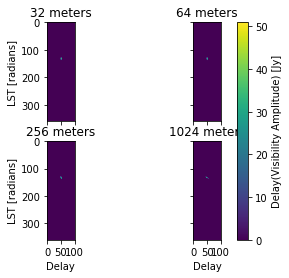

In [20]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.abs(ddata_ad[0]),extent=extent)
axs[0, 0].set_title('32 meters')
axs[0, 1].imshow(np.abs(ddata_ad[1]),extent=extent)
axs[0, 1].set_title('64 meters')
axs[1, 0].imshow(np.abs(ddata_ad[2]),extent=extent)
axs[1, 0].set_title('256 meters')
axs[1, 1].imshow(np.abs(ddata_ad[3]),extent=extent)
axs[1, 1].set_title('1024 meters')
image1 = axs[0,0].imshow(np.abs(ddata_ad[0]))
image2 = axs[0,1].imshow(np.abs(ddata_ad[1]))
image3= axs[1,0].imshow(np.abs(ddata_ad[2]))
image4 = axs[1,1].imshow(np.abs(ddata_ad[3]))
fig.colorbar(image1,ax=axs, orientation='vertical',label='Delay(Visibility Amplitude) [Jy]')

for ax in axs.flat:
    ax.set(xlabel='Delay', ylabel='LST [radians]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

$\textbf{Visibility Simulation for Multi-Point Source}$

In [26]:
lsts = np.arange(0.0,2.0*np.pi,np.deg2rad(1.0))
freqs = np.arange(160.0,200.0,0.1)

d_block =0.0
#parametized airydisk

a_x = 7.0 #np.random.normal(6.0,0.01)
a_y = 7.0 #np.random.normal(6.0,0.01)



d_diam = 14.0 
ant1_theta_error,ant1_phi_error, ant2_theta_error,ant2_phi_error,Ant1_beam_size_error,Ant2_beam_size_error = 0.0,0.0,0.0,0.0,0.0,0.0

In [27]:

vis_gp =np.zeros((lsts.size,freqs.size),dtype='complex')
vis_ad =np.zeros((lsts.size,freqs.size),dtype='complex')
for lst_i in range(lsts.size):
            #star hour angle
                ra=[lsts[lst_i] -RA[src_i] for src_i in range(RA.size)]
            
                src_pos_lmn = [pos_lmn(ra[src_i],DEC[src_i],np.deg2rad(RA_0),np.deg2rad(DEC_0)) for src_i in range(len(ra))]
            
            
                #compute the visibility for all frequency
                vis_freq_gp = np.zeros(freqs.size,dtype ='complex')
                vis_freq_ad = np.zeros(freqs.size,dtype ='complex')
                for freq_i in range(freqs.size):
                    lambda_ = (3e8)/(freqs[freq_i]*10**6)
                    sigma_fwhm = sigma_func(d_diam,freqs[freq_i]*10**6)
                
                    vis_freq_gp[freq_i]= np.sum([flux_func(freqs[freq_i],data_bestfit[src_i][0], data_bestfit[src_i][1])*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),DEC[src_i],ra[src_i],sigma_fwhm,0.0,0.0,0.0)*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),DEC[src_i],ra[src_i],sigma_fwhm,0.0,0.0,0.0)*np.exp(-1j*2.0*np.pi*np.dot(bl_xyz/lambda_,src_pos_lmn[src_i])) for src_i in range(len(src_pos_lmn))])
                    #vis_freq_ad[freq_i]= np.sum([flux_func(freqs[freq_i],data_bestfit[src_i][0], data_bestfit[src_i][1])*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),DEC[src_i],ra[src_i],a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),DEC[src_i],ra[src_i],a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*np.exp(-1j*2.0*np.pi*np.dot(bl_xyz/lambda_,src_pos_lmn[src_i])) for src_i in range(len(src_pos_lmn))])
                vis_gp[lst_i,:] = vis_freq_gp
                #vis_ad[lst_i,:] = vis_freq_ad
            
    vis_all_bls_gp.append(vis_gp)
                


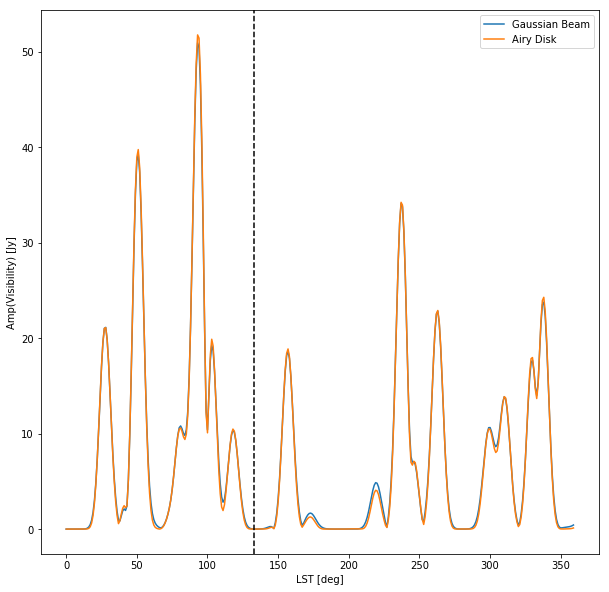

In [26]:

plt.figure(figsize =(10,10))
plt.plot(np.rad2deg(lsts),np.abs(vis_gp[:,1]),label='Gaussian Beam')
plt.plot(np.rad2deg(lsts),np.abs(vis_ad[:,1]),label='Airy Disk')
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [deg]')
plt.ylabel('Amp(Visibility) [Jy]')
plt.legend(loc='best')

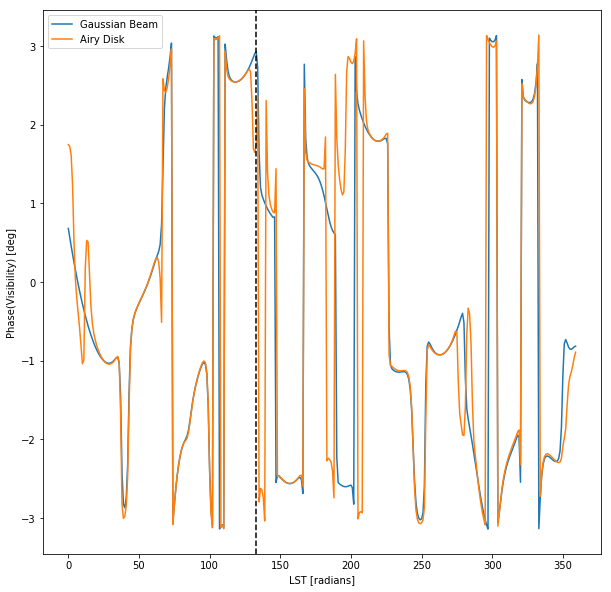

In [27]:
plt.figure(figsize =(10,10))
plt.plot(np.rad2deg(lsts),np.angle(vis_gp[:,1]),label='Gaussian Beam')
plt.plot(np.rad2deg(lsts),np.angle(vis_ad[:,1]),label='Airy Disk')
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [radians]')
plt.ylabel('Phase(Visibility) [deg]')
plt.legend(loc='best')

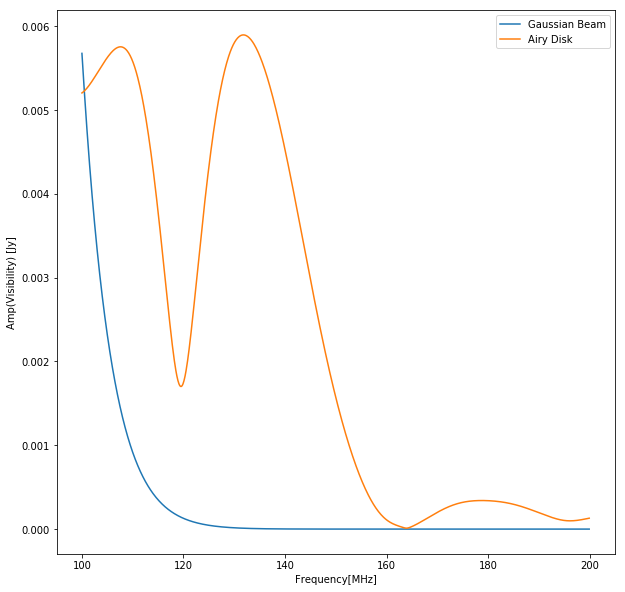

In [28]:
plt.figure(figsize =(10,10))
plt.plot(freqs,np.abs(vis_gp[133]),label='Gaussian Beam')
plt.plot(freqs,np.abs(vis_ad[133]),label='Airy Disk')
plt.xlabel('Frequency[MHz]')
plt.ylabel('Amp(Visibility) [Jy]')
plt.legend(loc='best')


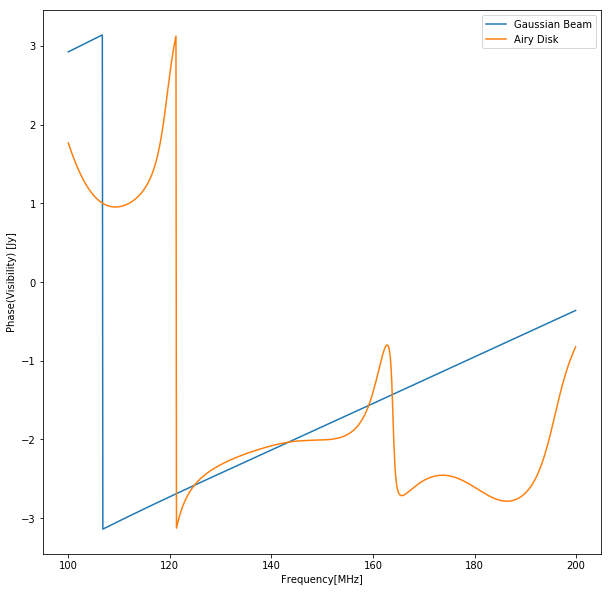

In [29]:

plt.figure(figsize =(10,10))
plt.plot(freqs,np.angle(vis_gp[133]),label='Gaussian Beam')
plt.plot(freqs,np.angle(vis_ad[133]),label='Airy Disk')
plt.xlabel('Frequency[MHz]')
plt.ylabel('Phase(Visibility) [Jy]')
plt.legend(loc='best')

$\textbf{Visibility Waterfall}$

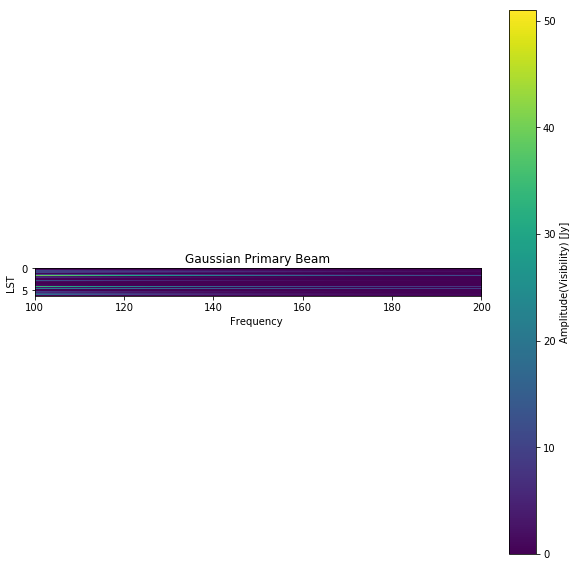

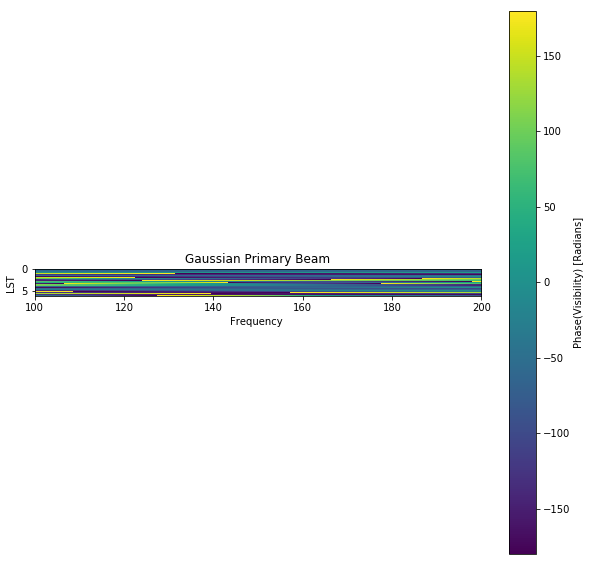

In [30]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.abs(vis_gp),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.angle(vis_gp,deg='deg'),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

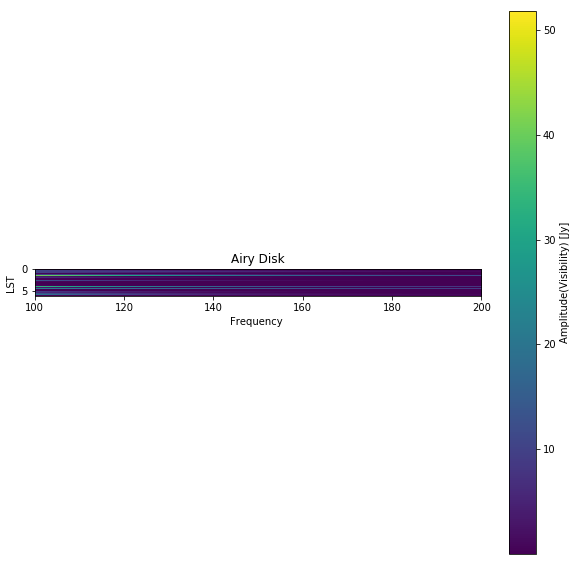

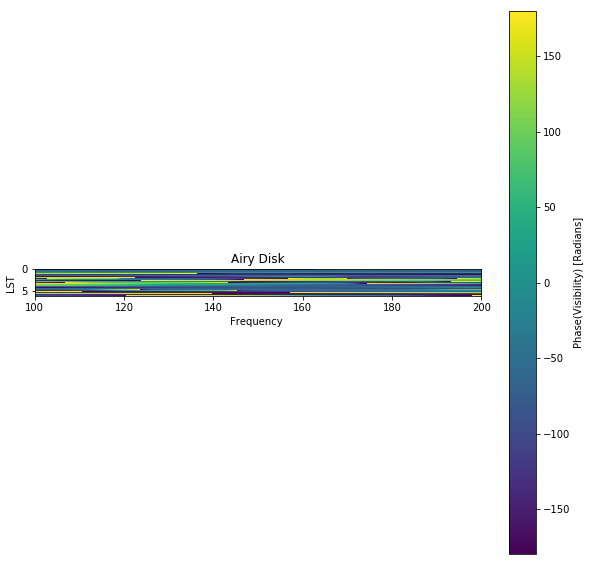

In [38]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.abs(vis_ad),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.angle(vis_ad,deg='deg'),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

$\textbf{Delay Visibility}$

In [40]:
ddata_gb = np.array([get_delay_vis(vis_gp[lst_i]*jy2mK,window,freqs)[1] for lst_i in range(vis_gp.shape[0])])
ddata_ad = np.array([get_delay_vis(vis_ad[lst_i]*jy2mK,window,freqs)[1] for lst_i in range(vis_ad.shape[0])])

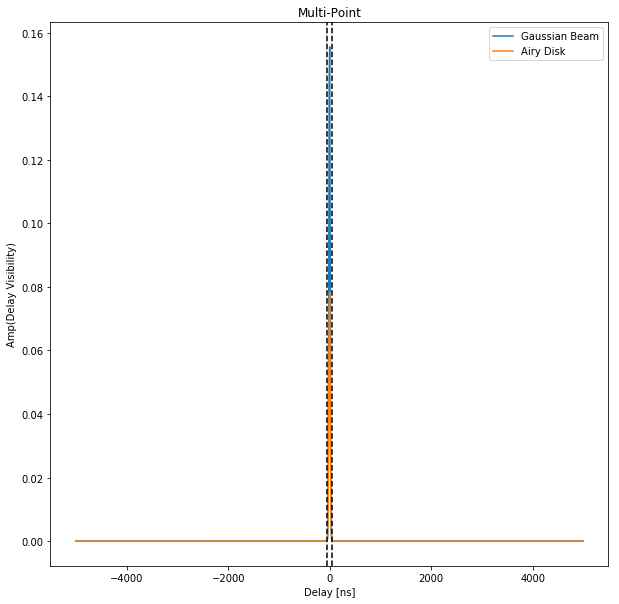

In [56]:
delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6 -freqs[0]*10**6)
delays = np.fft.fftshift(delays)*10**9

plt.figure(figsize=(10,10))
plt.title('Multi-Point')
plt.plot(delays,np.abs(ddata_gb[40]),label='Gaussian Beam')
plt.plot(delays,np.abs(ddata_ad[40]),label='Airy Disk')
plt.axvline(g_dl*10**9,ls='dashed',color='black')
plt.axvline(-g_dl*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


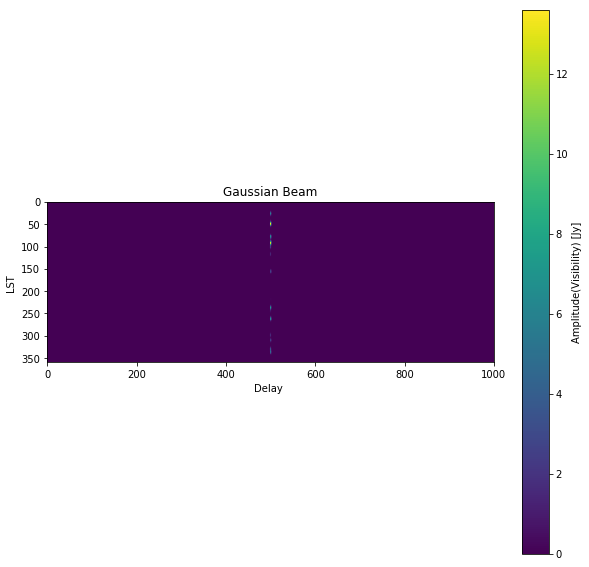

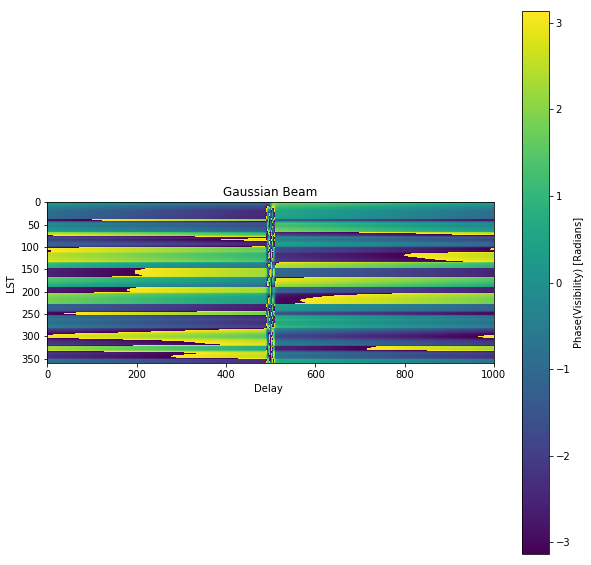

In [57]:
delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6-freqs[0]*10**6)
delays = np.fft.fftshift(delays)
extent =[delays[0],delays[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.abs(ddata_gb))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.angle(ddata_gb))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()



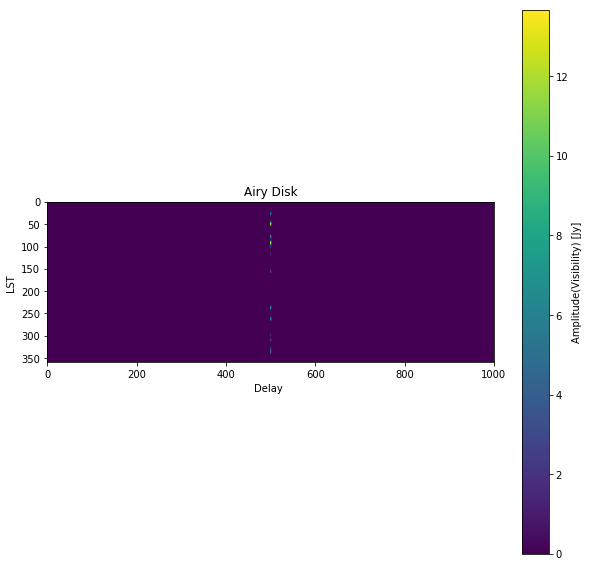

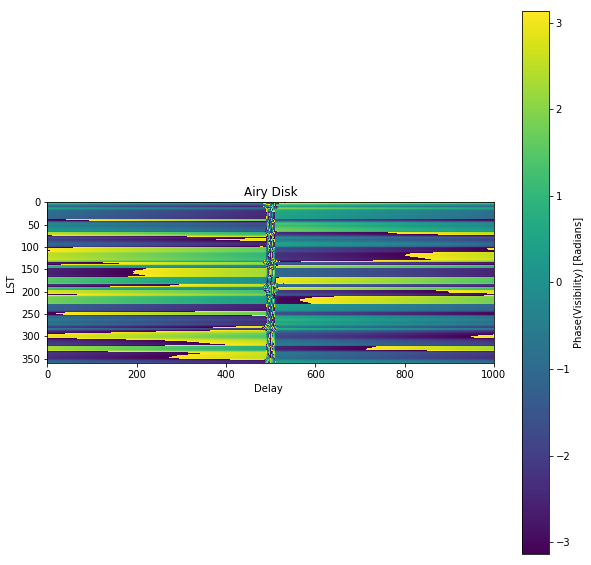

In [58]:
plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.abs(ddata_ad))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.angle(ddata_ad))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

$\textbf{Simulating Multi-baseline Visibility}$

In [33]:
RA_0,DEC_0 = 21.41100,-30.72100
lsts = np.array([np.deg2rad(93.0)]) #sources closer to the Zenith
freqs = np.arange(100.0,200.0,0.1)

dish_diam =14.0
d_block = 0.75

vis={}

for ubl_i, redblock in ublDict.iteritems():
    vis_red =np.zeros((len(redblock),freqs.size),dtype='complex')
    for antpair_i in range(len(redblock)):
        ant1_pos, ant2_pos = hera_hex_pos[redblock[antpair_i][0]],  hera_hex_pos[redblock[antpair_i][1]]
        vis_red[antpair_i] = vis_sim_gaussian_beam_bl(ant1_pos,ant2_pos,dish_diam,RA_0,DEC_0,RA,DEC,data_bestfit,freqs,lsts,0.0,0.0,0.0,0.0,0.0,0.0)
    vis[ubl_i] = vis_red
    
    

        

In [142]:
visdelay

{1460.0: [array([ 7.20498865e-06+9.81255974e-06j,  7.23577096e-06+9.78996346e-06j,
          7.26655397e-06+9.76736681e-06j,  7.29733829e-06+9.74476935e-06j,
          7.32812452e-06+9.72217064e-06j,  7.35891327e-06+9.69957023e-06j,
          7.38970514e-06+9.67696767e-06j,  7.42050074e-06+9.65436252e-06j,
          7.45130068e-06+9.63175433e-06j,  7.48210557e-06+9.60914267e-06j,
          7.51291600e-06+9.58652708e-06j,  7.54373260e-06+9.56390711e-06j,
          7.57455596e-06+9.54128233e-06j,  7.60538670e-06+9.51865227e-06j,
          7.63622543e-06+9.49601651e-06j,  7.66707276e-06+9.47337458e-06j,
          7.69792929e-06+9.45072605e-06j,  7.72879564e-06+9.42807045e-06j,
          7.75967243e-06+9.40540735e-06j,  7.79056026e-06+9.38273629e-06j,
          7.82145975e-06+9.36005682e-06j,  7.85237151e-06+9.33736850e-06j,
          7.88329616e-06+9.31467086e-06j,  7.91423432e-06+9.29196346e-06j,
          7.94518660e-06+9.26924584e-06j,  7.97615363e-06+9.24651755e-06j,
          8.00713

In [136]:
visdelay ={}

for ubl_j, vis_i in vis.iteritems():
    vis_redblock=[]
    
    for bl_j in range(len(vis_i)):
        vis_redblock.append(get_delay_vis(vis_i[bl_j]*jy2mK,window,freqs)[1])
        
    visdelay[np.linalg.norm(ubl_j)]=vis_redblock
    
    
    
    


In [126]:

bllenDick =[np.linalg.norm(visdelay.keys()[i]) for i in range(len(visdelay.keys()))] 

bllenvecs_sorted = sorted(bllenDick)

bllenvecs_sorted,len(bllenDick)

([1460.0,
  1460.1934803306033,
  2528.6013920742826,
  2528.9058899057513,
  2919.8330431721606,
  2920.0,
  3862.6707082017747,
  3862.8269440915938,
  3862.870046998734,
  4380.0,
  4380.026483938196,
  5057.491967368806,
  5057.842326526204,
  5264.126898166494,
  5264.158527248206,
  5264.348867618863,
  5840.0,
  5840.219944488393],
 18)

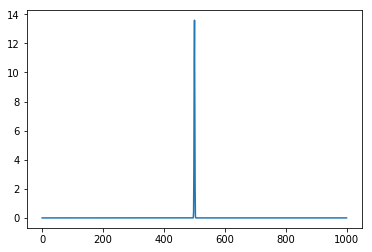

In [158]:
visdelay_std=np.array([visdelay[bllenvecs_sorted[j]][0] for j in range(len(bllenvecs_sorted))]).T
           
plt.plot(np.abs(visdelay_std[:,0]))

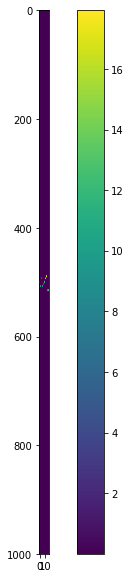

In [159]:


plt.figure(figsize=(10,10))

plt.imshow(np.abs(visdelay_std))
plt.colorbar()

In [160]:
np.abs(visdelay_std)

array([[1.21736679e-05, 2.00044060e-05, 1.36119689e-05, ...,
        1.51072313e-05, 1.20083062e-05, 1.31653664e-05],
       [1.21737326e-05, 2.00038138e-05, 1.36110879e-05, ...,
        1.51051912e-05, 1.20084208e-05, 1.31636184e-05],
       [1.21739172e-05, 2.00034187e-05, 1.36103412e-05, ...,
        1.51033003e-05, 1.20086538e-05, 1.31620005e-05],
       ...,
       [1.21741931e-05, 2.00073650e-05, 1.36154170e-05, ...,
        1.51142485e-05, 1.20086718e-05, 1.31713917e-05],
       [1.21738982e-05, 2.00061816e-05, 1.36141334e-05, ...,
        1.51117598e-05, 1.20084316e-05, 1.31692530e-05],
       [1.21737231e-05, 2.00051952e-05, 1.36129840e-05, ...,
        1.51094209e-05, 1.20083098e-05, 1.31672446e-05]])

5